<a href="https://colab.research.google.com/github/Amit198181/JBVNL/blob/main/Linear_Arima_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving consumer_load_sales_MYT.xlsx to consumer_load_sales_MYT.xlsx


In [3]:
import pandas as pd

# Assuming the uploaded file is an Excel file, replace 'consumers_MYT.xlsx' with the actual filename if different
file_name = list(uploaded.keys())[0]
df = pd.read_excel(file_name)

display(df.head())

,Consumers Number (Category-wise),FY 2021-22,FY 2022-23,FY 2023-24,FY 2024-25,FY 2025-26
0,Domestic,4252591,4440783,4545190,4810658,4973404
1,Commercial/Non Domestic,249932,277781,349430,421241,498081
2,Public Lighting / SS,448,492,598,730,843
3,Irrigation / IAS,93930,97337,101368,110613,114909
4,Industrial LT / LTIS,16957,18357,19311,20147,21500


In [4]:
display(df.describe())

,Consumers Number (Category-wise),FY 2021-22,FY 2022-23,FY 2023-24,FY 2024-25,FY 2025-26
count,17,17,17,17,17,17
unique,10,17,17,17,17,17
top,Domestic,4252591,4440783,4545190,4810658,4973404
freq,2,1,1,1,1,1


In [5]:
# Find the index where the 'Connected Load/Demand' section starts
split_index = df[df['Consumers Number (Category-wise)'].str.contains('Connected Load/Demand', na=False)].index[0]

# Split the DataFrame
consumers_df = df.iloc[:split_index].copy()
load_df = df.iloc[split_index + 1:].copy()

# Rename the first column for clarity
consumers_df = consumers_df.rename(columns={'Consumers Number (Category-wise)': 'Category'})
load_df = load_df.rename(columns={'Consumers Number (Category-wise)': 'Category'})


print("Consumer Numbers DataFrame:")
display(consumers_df)

print("\nConnected Load DataFrame:")
display(load_df)

Consumer Numbers DataFrame:


,Category,FY 2021-22,FY 2022-23,FY 2023-24,FY 2024-25,FY 2025-26
0,Domestic,4252591,4440783,4545190,4810658,4973404
1,Commercial/Non Domestic,249932,277781,349430,421241,498081
2,Public Lighting / SS,448,492,598,730,843
3,Irrigation / IAS,93930,97337,101368,110613,114909
4,Industrial LT / LTIS,16957,18357,19311,20147,21500
5,Industrial HT / HTS,2071,2202,2359,2545,2716
6,RTS/MES,7,8,8,9,10
7,Total_Consumers,4515936,4737460,5018256,5365944,5656511



Connected Load DataFrame:


,Category,FY 2021-22,FY 2022-23,FY 2023-24,FY 2024-25,FY 2025-26
9,Domestic,4807967,5230046,6554225,5743817,6706262
10,Commercial/Non Domestic,645343,780234,969187,1057907,1296451
11,Public Lighting / SS,11873,12932,14300,15462,16969
12,Irrigation / IAS,152285,163589,177343,208158,224632
13,Industrial LT / LTIS,391240,444330,495931,574903,647267
14,Industrial HT / HTS,967852,1056420,1066056,1176729,1234986
15,RTS/MES,51308,53420,34423,57644,47216
16,Total_Load,7027868,7740971,9311465,8834620,10169160


In [6]:
# Select only the financial year columns from load_df
load_years_df = load_df.set_index('Category').filter(like='FY')

# Calculate the year-over-year percentage change
# Transpose to calculate change across columns (years) for each category
load_growth_rate = load_years_df.T.pct_change() * 100

# Transpose back to have years as columns and categories as rows
load_growth_rate = load_growth_rate.T

# Rename columns to indicate growth rate
load_growth_rate.columns = [f'{col} Growth Rate (%)' for col in load_growth_rate.columns]

print("Year-over-Year Connected Load Growth Rate (%):")
display(load_growth_rate)

Year-over-Year Connected Load Growth Rate (%):


/tmp/ipython-input-2438395993.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  load_growth_rate = load_years_df.T.pct_change() * 100


,FY 2021-22 Growth Rate (%),FY 2022-23 Growth Rate (%),FY 2023-24 Growth Rate (%),FY 2024-25 Growth Rate (%),FY 2025-26 Growth Rate (%)
Category,,,,,
Domestic,NaN,8.778742,25.318687,-12.364666,16.756192
Commercial/Non Domestic,NaN,20.902218,24.217478,9.154064,22.548674
Public Lighting / SS,NaN,8.919397,10.578410,8.125874,9.746475
Irrigation / IAS,NaN,7.422924,8.407656,17.375933,7.914181
Industrial LT / LTIS,NaN,13.569676,11.613215,15.923989,12.587167
Industrial HT / HTS,NaN,9.150986,0.912137,10.381537,4.950758
RTS/MES,NaN,4.116317,-35.561587,67.457804,-18.090348
Total_Load,NaN,10.146790,20.288075,-5.121052,15.105800


In [7]:
# Select only the financial year columns from consumers_df
consumers_years_df = consumers_df.set_index('Category').filter(like='FY')

# Calculate the year-over-year percentage change
# Transpose to calculate change across columns (years) for each category
consumers_growth_rate = consumers_years_df.T.pct_change() * 100

# Transpose back to have years as columns and categories as rows
consumers_growth_rate = consumers_growth_rate.T

# Rename columns to indicate growth rate
consumers_growth_rate.columns = [f'{col} Growth Rate (%)' for col in consumers_growth_rate.columns]

print("Year-over-Year Consumer Number Growth Rate (%):")
display(consumers_growth_rate)

Year-over-Year Consumer Number Growth Rate (%):


/tmp/ipython-input-2251756318.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  consumers_growth_rate = consumers_years_df.T.pct_change() * 100


,FY 2021-22 Growth Rate (%),FY 2022-23 Growth Rate (%),FY 2023-24 Growth Rate (%),FY 2024-25 Growth Rate (%),FY 2025-26 Growth Rate (%)
Category,,,,,
Domestic,NaN,4.425349,2.351094,5.840636,3.383030
Commercial/Non Domestic,NaN,11.142631,25.793341,20.550897,18.241339
Public Lighting / SS,NaN,9.821429,21.544715,22.073579,15.479452
Irrigation / IAS,NaN,3.627169,4.141282,9.120235,3.883811
Industrial LT / LTIS,NaN,8.256177,5.196928,4.329139,6.715640
Industrial HT / HTS,NaN,6.325447,7.129882,7.884697,6.719057
RTS/MES,NaN,14.285714,0.000000,12.500000,11.111111
Total_Consumers,NaN,4.905384,5.927142,6.928463,5.415021


In [8]:
print("Year-over-Year Consumer Number Growth Rate (%):")
display(consumers_growth_rate)

print("\nYear-over-Year Connected Load Growth Rate (%):")
display(load_growth_rate)

Year-over-Year Consumer Number Growth Rate (%):


,FY 2021-22 Growth Rate (%),FY 2022-23 Growth Rate (%),FY 2023-24 Growth Rate (%),FY 2024-25 Growth Rate (%),FY 2025-26 Growth Rate (%)
Category,,,,,
Domestic,NaN,4.425349,2.351094,5.840636,3.383030
Commercial/Non Domestic,NaN,11.142631,25.793341,20.550897,18.241339
Public Lighting / SS,NaN,9.821429,21.544715,22.073579,15.479452
Irrigation / IAS,NaN,3.627169,4.141282,9.120235,3.883811
Industrial LT / LTIS,NaN,8.256177,5.196928,4.329139,6.715640
Industrial HT / HTS,NaN,6.325447,7.129882,7.884697,6.719057
RTS/MES,NaN,14.285714,0.000000,12.500000,11.111111
Total_Consumers,NaN,4.905384,5.927142,6.928463,5.415021



Year-over-Year Connected Load Growth Rate (%):


,FY 2021-22 Growth Rate (%),FY 2022-23 Growth Rate (%),FY 2023-24 Growth Rate (%),FY 2024-25 Growth Rate (%),FY 2025-26 Growth Rate (%)
Category,,,,,
Domestic,NaN,8.778742,25.318687,-12.364666,16.756192
Commercial/Non Domestic,NaN,20.902218,24.217478,9.154064,22.548674
Public Lighting / SS,NaN,8.919397,10.578410,8.125874,9.746475
Irrigation / IAS,NaN,7.422924,8.407656,17.375933,7.914181
Industrial LT / LTIS,NaN,13.569676,11.613215,15.923989,12.587167
Industrial HT / HTS,NaN,9.150986,0.912137,10.381537,4.950758
RTS/MES,NaN,4.116317,-35.561587,67.457804,-18.090348
Total_Load,NaN,10.146790,20.288075,-5.121052,15.105800


In [9]:
# Calculate the difference in growth rates
growth_rate_difference = load_growth_rate - consumers_growth_rate

print("Difference in Year-over-Year Growth Rate (Connected Load % - Consumer Numbers %):")
display(growth_rate_difference)

Difference in Year-over-Year Growth Rate (Connected Load % - Consumer Numbers %):


,FY 2021-22 Growth Rate (%),FY 2022-23 Growth Rate (%),FY 2023-24 Growth Rate (%),FY 2024-25 Growth Rate (%),FY 2025-26 Growth Rate (%)
Category,,,,,
Commercial/Non Domestic,NaN,9.759587,-1.575862,-11.396833,4.307335
Domestic,NaN,4.353392,22.967593,-18.205301,13.373162
Industrial HT / HTS,NaN,2.825539,-6.217745,2.496840,-1.768299
Industrial LT / LTIS,NaN,5.313499,6.416288,11.594851,5.871527
Irrigation / IAS,NaN,3.795755,4.266373,8.255697,4.030369
Public Lighting / SS,NaN,-0.902032,-10.966305,-13.947704,-5.732977
RTS/MES,NaN,-10.169397,-35.561587,54.957804,-29.201459
Total_Consumers,NaN,NaN,NaN,NaN,NaN
Total_Load,NaN,NaN,NaN,NaN,NaN


Certainly! The growth_rate_difference DataFrame shows the difference between the year-over-year growth rate of Connected Load and the year-over-year growth rate of Consumer Numbers for each category and financial year.

Here's how to interpret it:

Positive Value: If the value is positive for a specific category and financial year, it means that the Connected Load for that category grew at a faster percentage rate than the number of Consumers in that same year. This could indicate that existing consumers are increasing their load, or new consumers in that category are starting with higher loads.
Negative Value: If the value is negative, it means the Connected Load for that category grew at a slower percentage rate than the number of Consumers, or even decreased while consumer numbers increased. This might suggest that new consumers in that category are using less load, or existing consumers are reducing their load.
Zero or Close to Zero: A value near zero indicates that the growth rates for connected load and consumer numbers were similar for that category and year.
NaN Values: The NaN values in the first column (FY 2021-22 Growth Rate Difference) are expected because the year-over-year growth rate is calculated based on the change from the previous year. Since FY 2021-22 is the first year in your data, there is no previous year to calculate a growth rate from.
This DataFrame helps to identify categories where the change in connected load is disproportionate to the change in the number of consumers.

Would you like to explore any specific categories or years in this DataFrame, or perhaps visualize these differences?



In [10]:
# Calculate the absolute difference to find the magnitude of the difference
absolute_difference = growth_rate_difference.abs()

# Calculate the average absolute difference across all years for each category
average_absolute_difference = absolute_difference.mean(axis=1)

# Sort the categories by their average absolute difference in descending order
sorted_categories = average_absolute_difference.sort_values(ascending=False)

print("Categories with the largest average absolute growth rate differences:")
display(sorted_categories)

# Display the growth rate differences for the top categories (e.g., top 5)
top_n = 5
print(f"\nGrowth rate differences for the top {top_n} categories with the largest average absolute differences:")
display(growth_rate_difference.loc[sorted_categories.head(top_n).index])

Categories with the largest average absolute growth rate differences:


,0
Category,
RTS/MES,32.472562
Domestic,14.724862
Public Lighting / SS,7.887255
Industrial LT / LTIS,7.299041
Commercial/Non Domestic,6.759904
Irrigation / IAS,5.087049
Industrial HT / HTS,3.327106
Total_Consumers,NaN
Total_Load,NaN



Growth rate differences for the top 5 categories with the largest average absolute differences:


,FY 2021-22 Growth Rate (%),FY 2022-23 Growth Rate (%),FY 2023-24 Growth Rate (%),FY 2024-25 Growth Rate (%),FY 2025-26 Growth Rate (%)
Category,,,,,
RTS/MES,NaN,-10.169397,-35.561587,54.957804,-29.201459
Domestic,NaN,4.353392,22.967593,-18.205301,13.373162
Public Lighting / SS,NaN,-0.902032,-10.966305,-13.947704,-5.732977
Industrial LT / LTIS,NaN,5.313499,6.416288,11.594851,5.871527
Commercial/Non Domestic,NaN,9.759587,-1.575862,-11.396833,4.307335


# Task
Analyze the provided data to understand the relationship between consumer growth and connected load growth, identify categories with significant differences in these growth rates, and forecast consumer numbers and connected load for the financial years FY 2026-27 to FY 2030-31.

## Prepare data for forecasting

### Subtask:
Restructure the data so that each category's consumer numbers and connected load over time can be used for forecasting.


**Reasoning**:
Unpivot the consumer numbers DataFrame to long format and convert the financial year column to datetime and extract the year.



In [11]:
# Unpivot the consumers_df DataFrame
consumers_long = pd.melt(consumers_df, id_vars=['Category'], var_name='Financial_Year', value_name='Consumer_Numbers')

# Convert 'Financial_Year' to datetime and extract the year
consumers_long['Year'] = pd.to_datetime(consumers_long['Financial_Year'].str.replace('FY ', ''), format='%Y-%y').dt.year

display(consumers_long.head())

,Category,Financial_Year,Consumer_Numbers,Year
0,Domestic,FY 2021-22,4252591,2022
1,Commercial/Non Domestic,FY 2021-22,249932,2022
2,Public Lighting / SS,FY 2021-22,448,2022
3,Irrigation / IAS,FY 2021-22,93930,2022
4,Industrial LT / LTIS,FY 2021-22,16957,2022


**Reasoning**:
Unpivot the connected load DataFrame to long format and convert the financial year column to datetime and extract the year.



In [12]:
# Unpivot the load_df DataFrame
load_long = pd.melt(load_df, id_vars=['Category'], var_name='Financial_Year', value_name='Connected_Load')

# Convert 'Financial_Year' to datetime and extract the year
load_long['Year'] = pd.to_datetime(load_long['Financial_Year'].str.replace('FY ', ''), format='%Y-%y').dt.year

display(load_long.head())

,Category,Financial_Year,Connected_Load,Year
0,Domestic,FY 2021-22,4807967,2022
1,Commercial/Non Domestic,FY 2021-22,645343,2022
2,Public Lighting / SS,FY 2021-22,11873,2022
3,Irrigation / IAS,FY 2021-22,152285,2022
4,Industrial LT / LTIS,FY 2021-22,391240,2022


**Reasoning**:
Merge the unpivoted dataframes and display the head of the merged dataframe.



In [13]:
# Merge the two long format DataFrames
merged_df = pd.merge(consumers_long, load_long, on=['Category', 'Year'])

# Display the head of the merged DataFrame
display(merged_df.head())

,Category,Financial_Year_x,Consumer_Numbers,Year,Financial_Year_y,Connected_Load
0,Domestic,FY 2021-22,4252591,2022,FY 2021-22,4807967
1,Commercial/Non Domestic,FY 2021-22,249932,2022,FY 2021-22,645343
2,Public Lighting / SS,FY 2021-22,448,2022,FY 2021-22,11873
3,Irrigation / IAS,FY 2021-22,93930,2022,FY 2021-22,152285
4,Industrial LT / LTIS,FY 2021-22,16957,2022,FY 2021-22,391240


## Choose a forecasting model

### Subtask:
Select appropriate time series forecasting models for consumer numbers and connected load.


## Train and evaluate models

### Subtask:
Train the selected models on the historical data and evaluate their performance.


**Reasoning**:
Filter the merged_df to exclude 'Total_Consumers' and 'Total_Load', then iterate through the remaining categories to prepare the data for forecasting and train a simple linear regression model for both consumer numbers and connected load. Evaluate the models using MAE and RMSE.



In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Filter out aggregate categories
filtered_merged_df = merged_df[~merged_df['Category'].isin(['Total_Consumers', 'Total_Load'])].copy()

# Store evaluation metrics
evaluation_metrics = {}

for category in filtered_merged_df['Category'].unique():
    evaluation_metrics[category] = {}

    # Filter data for the current category
    category_df = filtered_merged_df[filtered_merged_df['Category'] == category].copy()

    # Prepare data for Consumer_Numbers forecasting
    X_consumers = category_df[['Year']]
    y_consumers = category_df['Consumer_Numbers']

    # Prepare data for Connected_Load forecasting
    X_load = category_df[['Year']]
    y_load = category_df['Connected_Load']

    # Split data into training and testing sets (using the last year for testing)
    # Find the last year in the dataset
    last_year = category_df['Year'].max()
    X_train_consumers = X_consumers[X_consumers['Year'] < last_year]
    X_test_consumers = X_consumers[X_consumers['Year'] == last_year]
    y_train_consumers = y_consumers[category_df['Year'] < last_year]
    y_test_consumers = y_consumers[category_df['Year'] == last_year]

    X_train_load = X_load[X_load['Year'] < last_year]
    X_test_load = X_load[X_load['Year'] == last_year]
    y_train_load = y_load[category_df['Year'] < last_year]
    y_test_load = y_load[category_df['Year'] == last_year]


    # Train Linear Regression model for Consumer_Numbers
    model_consumers = LinearRegression()
    model_consumers.fit(X_train_consumers, y_train_consumers)

    # Evaluate Consumer_Numbers model
    y_pred_consumers = model_consumers.predict(X_test_consumers)
    mae_consumers = mean_absolute_error(y_test_consumers, y_pred_consumers)
    rmse_consumers = np.sqrt(mean_squared_error(y_test_consumers, y_pred_consumers))

    evaluation_metrics[category]['Consumer_Numbers'] = {'MAE': mae_consumers, 'RMSE': rmse_consumers}

    # Train Linear Regression model for Connected_Load
    model_load = LinearRegression()
    model_load.fit(X_train_load, y_train_load)

    # Evaluate Connected_Load model
    y_pred_load = model_load.predict(X_test_load)
    mae_load = mean_absolute_error(y_test_load, y_pred_load)
    rmse_load = np.sqrt(mean_squared_error(y_test_load, y_pred_load))

    evaluation_metrics[category]['Connected_Load'] = {'MAE': mae_load, 'RMSE': rmse_load}

# Aggregate evaluation metrics
aggregated_metrics = pd.DataFrame.from_dict({(i,j): evaluation_metrics[i][j]
                           for i in evaluation_metrics.keys()
                           for j in evaluation_metrics[i].keys()},
                           orient='index')

print("Evaluation Metrics (MAE and RMSE) for each category and metric:")
display(aggregated_metrics)

Evaluation Metrics (MAE and RMSE) for each category and metric:


MAE     RMSE
Domestic                Consumer_Numbers  16446.5  16446.5
                        Connected_Load    89316.0  89316.0
Commercial/Non Domestic Consumer_Numbers  27091.0  27091.0
                        Connected_Load    76622.0  76622.0
Public Lighting / SS    Consumer_Numbers     38.0     38.0
                        Connected_Load      293.5    293.5
Irrigation / IAS        Consumer_Numbers    577.0    577.0
                        Connected_Load     3945.0   3945.0
Industrial LT / LTIS    Consumer_Numbers    176.0    176.0
                        Connected_Load    20018.5  20018.5
Industrial HT / HTS     Consumer_Numbers     27.0     27.0
                        Connected_Load     9155.0   9155.0
RTS/MES                 Consumer_Numbers      0.5      0.5
                        Connected_Load     1985.5   1985.5

## Forecast future values

### Subtask:
Use the trained models to forecast consumer numbers and connected load for the specified future financial years (FY 2026-27 to FY 2030-31).


**Reasoning**:
Create a DataFrame with future years and iterate through categories to forecast using the trained models.



In [15]:
# Create DataFrame for future years (2027 to 2031)
future_years = pd.DataFrame({'Year': range(2027, 2032)})

# Store forecasted values
forecasted_data = []

# Iterate through each unique category (excluding totals)
for category in filtered_merged_df['Category'].unique():
    # Retrieve the trained models (assuming they are stored or can be retrained here for demonstration)
    # In a real scenario, you would load the trained models
    category_df = filtered_merged_df[filtered_merged_df['Category'] == category].copy()
    X_consumers = category_df[['Year']]
    y_consumers = category_df['Consumer_Numbers']
    X_load = category_df[['Year']]
    y_load = category_df['Connected_Load']

    model_consumers = LinearRegression()
    model_consumers.fit(X_consumers, y_consumers)

    model_load = LinearRegression()
    model_load.fit(X_load, y_load)

    # Predict consumer numbers and connected load for future years
    future_consumer_predictions = model_consumers.predict(future_years)
    future_load_predictions = model_load.predict(future_years)

    # Store the forecasted values
    for i, year in enumerate(future_years['Year']):
        financial_year = f'FY {year}-{str(year+1)[-2:]}'
        forecasted_data.append({
            'Category': category,
            'Financial_Year': financial_year,
            'Year': year,
            'Forecasted_Consumer_Numbers': future_consumer_predictions[i],
            'Forecasted_Connected_Load': future_load_predictions[i]
        })

# Create a DataFrame from the forecasted data
forecasted_df = pd.DataFrame(forecasted_data)

print("Forecasted Consumer Numbers and Connected Load (FY 2026-27 to FY 2030-31):")
display(forecasted_df)

Forecasted Consumer Numbers and Connected Load (FY 2026-27 to FY 2030-31):


,Category,Financial_Year,Year,Forecasted_Consumer_Numbers,Forecasted_Connected_Load
0,Domestic,FY 2027-28,2027,5147975.5,7101571.7
1,Domestic,FY 2028-29,2028,5329125.6,7532607.8
2,Domestic,FY 2029-30,2029,5510275.7,7963643.9
3,Domestic,FY 2030-31,2030,5691425.8,8394680.0
4,Domestic,FY 2031-32,2031,5872575.9,8825716.1
5,Commercial/Non Domestic,FY 2027-28,2027,551220.4,1423791.1
6,Commercial/Non Domestic,FY 2028-29,2028,615196.2,1581780.0
7,Commercial/Non Domestic,FY 2029-30,2029,679172.0,1739768.9
8,Commercial/Non Domestic,FY 2030-31,2030,743147.8,1897757.8
9,Commercial/Non Domestic,FY 2031-32,2031,807123.6,2055746.7


In [20]:
from google.colab import files
uploaded = files.upload()

Saving consumer_load_sales_MYT.xlsx to consumer_load_sales_MYT.xlsx


In [21]:
import pandas as pd

# Assuming the uploaded file is an Excel file, replace 'consumers_MYT.xlsx' with the actual filename if different
file_name = list(uploaded.keys())[0]
df = pd.read_excel(file_name)

display(df.head())

,Consumers Number (Category-wise),FY 2021-22,FY 2022-23,FY 2023-24,FY 2024-25,FY 2025-26
0,Domestic,4252591,4440783,4545190,4810658,4973404
1,Commercial/Non Domestic,249932,277781,349430,421241,498081
2,Public Lighting / SS,448,492,598,730,843
3,Irrigation / IAS,93930,97337,101368,110613,114909
4,Industrial LT / LTIS,16957,18357,19311,20147,21500


## Prepare data for forecasting

### Subtask:
Restructure the data so that each category's consumer numbers and connected load over time can be used for forecasting.

In [22]:
# Find the index where the 'Connected Load/Demand' section starts
split_index = df[df['Consumers Number (Category-wise)'].str.contains('Connected Load/Demand', na=False)].index[0]

# Split the DataFrame
consumers_df = df.iloc[:split_index].copy()
load_df = df.iloc[split_index + 1:].copy()

# Rename the first column for clarity
consumers_df = consumers_df.rename(columns={'Consumers Number (Category-wise)': 'Category'})
load_df = load_df.rename(columns={'Consumers Number (Category-wise)': 'Category'})


print("Consumer Numbers DataFrame:")
display(consumers_df)

print("\nConnected Load DataFrame:")
display(load_df)

Consumer Numbers DataFrame:


,Category,FY 2021-22,FY 2022-23,FY 2023-24,FY 2024-25,FY 2025-26
0,Domestic,4252591,4440783,4545190,4810658,4973404
1,Commercial/Non Domestic,249932,277781,349430,421241,498081
2,Public Lighting / SS,448,492,598,730,843
3,Irrigation / IAS,93930,97337,101368,110613,114909
4,Industrial LT / LTIS,16957,18357,19311,20147,21500
5,Industrial HT / HTS,2071,2202,2359,2545,2716
6,RTS/MES,7,8,8,9,10
7,Total_Consumers,4515936,4737460,5018256,5365944,5656511



Connected Load DataFrame:


,Category,FY 2021-22,FY 2022-23,FY 2023-24,FY 2024-25,FY 2025-26
9,Domestic,4807967,5230046,6554225,5743817,6706262
10,Commercial/Non Domestic,645343,780234,969187,1057907,1296451
11,Public Lighting / SS,11873,12932,14300,15462,16969
12,Irrigation / IAS,152285,163589,177343,208158,224632
13,Industrial LT / LTIS,391240,444330,495931,574903,647267
14,Industrial HT / HTS,967852,1056420,1066056,1176729,1234986
15,RTS/MES,51308,53420,34423,57644,47216
16,Total_Load,7027868,7740971,9311465,8834620,10169160


In [23]:
# Unpivot the consumers_df DataFrame
consumers_long = pd.melt(consumers_df, id_vars=['Category'], var_name='Financial_Year', value_name='Consumer_Numbers')

# Convert 'Financial_Year' to datetime and extract the year
consumers_long['Year'] = pd.to_datetime(consumers_long['Financial_Year'].str.replace('FY ', ''), format='%Y-%y').dt.year

display(consumers_long.head())

,Category,Financial_Year,Consumer_Numbers,Year
0,Domestic,FY 2021-22,4252591,2022
1,Commercial/Non Domestic,FY 2021-22,249932,2022
2,Public Lighting / SS,FY 2021-22,448,2022
3,Irrigation / IAS,FY 2021-22,93930,2022
4,Industrial LT / LTIS,FY 2021-22,16957,2022


In [24]:
# Unpivot the load_df DataFrame
load_long = pd.melt(load_df, id_vars=['Category'], var_name='Financial_Year', value_name='Connected_Load')

# Convert 'Financial_Year' to datetime and extract the year
load_long['Year'] = pd.to_datetime(load_long['Financial_Year'].str.replace('FY ', ''), format='%Y-%y').dt.year

display(load_long.head())

,Category,Financial_Year,Connected_Load,Year
0,Domestic,FY 2021-22,4807967,2022
1,Commercial/Non Domestic,FY 2021-22,645343,2022
2,Public Lighting / SS,FY 2021-22,11873,2022
3,Irrigation / IAS,FY 2021-22,152285,2022
4,Industrial LT / LTIS,FY 2021-22,391240,2022


In [25]:
# Merge the two long format DataFrames
merged_df = pd.merge(consumers_long, load_long, on=['Category', 'Year'])

# Display the head of the merged DataFrame
display(merged_df.head())

,Category,Financial_Year_x,Consumer_Numbers,Year,Financial_Year_y,Connected_Load
0,Domestic,FY 2021-22,4252591,2022,FY 2021-22,4807967
1,Commercial/Non Domestic,FY 2021-22,249932,2022,FY 2021-22,645343
2,Public Lighting / SS,FY 2021-22,448,2022,FY 2021-22,11873
3,Irrigation / IAS,FY 2021-22,93930,2022,FY 2021-22,152285
4,Industrial LT / LTIS,FY 2021-22,16957,2022,FY 2021-22,391240


In [26]:
# Assuming 'merged_df' is available from previous steps
# Filter out aggregate categories
filtered_merged_df = merged_df[~merged_df['Category'].isin(['Total_Consumers', 'Total_Load'])].copy()

print("Filtered Merged DataFrame (excluding totals):")
display(filtered_merged_df.head())

Filtered Merged DataFrame (excluding totals):


,Category,Financial_Year_x,Consumer_Numbers,Year,Financial_Year_y,Connected_Load
0,Domestic,FY 2021-22,4252591,2022,FY 2021-22,4807967
1,Commercial/Non Domestic,FY 2021-22,249932,2022,FY 2021-22,645343
2,Public Lighting / SS,FY 2021-22,448,2022,FY 2021-22,11873
3,Irrigation / IAS,FY 2021-22,93930,2022,FY 2021-22,152285
4,Industrial LT / LTIS,FY 2021-22,16957,2022,FY 2021-22,391240


## Forecast future values

### Subtask:
Use the trained models to forecast consumer numbers and connected load for the specified future financial years (FY 2026-27 to FY 2030-31).

In [27]:
from sklearn.linear_model import LinearRegression

# Create DataFrame for future years (2027 to 2031)
future_years = pd.DataFrame({'Year': range(2027, 2032)})

# Store forecasted values
forecasted_data = []

# Iterate through each unique category (excluding totals)
for category in filtered_merged_df['Category'].unique():
    # Retrieve the trained models (assuming they are stored or can be retrained here for demonstration)
    # In a real scenario, you would load the trained model
    category_df = filtered_merged_df[filtered_merged_df['Category'] == category].copy()
    X_consumers = category_df[['Year']]
    y_consumers = category_df['Consumer_Numbers']
    X_load = category_df[['Year']]
    y_load = category_df['Connected_Load']

    model_consumers = LinearRegression()
    model_consumers.fit(X_consumers, y_consumers)

    model_load = LinearRegression()
    model_load.fit(X_load, y_load)

    # Predict consumer numbers and connected load for future years
    future_consumer_predictions = model_consumers.predict(future_years)
    future_load_predictions = model_load.predict(future_years)

    # Store the forecasted values
    for i, year in enumerate(future_years['Year']):
        financial_year = f'FY {year}-{str(year+1)[-2:]}'
        forecasted_data.append({
            'Category': category,
            'Financial_Year': financial_year,
            'Year': year,
            'Forecasted_Consumer_Numbers': future_consumer_predictions[i],
            'Forecasted_Connected_Load': future_load_predictions[i]
        })

# Create a DataFrame from the forecasted data
forecasted_df = pd.DataFrame(forecasted_data)

print("Forecasted Consumer Numbers and Connected Load (FY 2026-27 to FY 2030-31):")
display(forecasted_df)

Forecasted Consumer Numbers and Connected Load (FY 2026-27 to FY 2030-31):


,Category,Financial_Year,Year,Forecasted_Consumer_Numbers,Forecasted_Connected_Load
0,Domestic,FY 2027-28,2027,5147975.5,7101571.7
1,Domestic,FY 2028-29,2028,5329125.6,7532607.8
2,Domestic,FY 2029-30,2029,5510275.7,7963643.9
3,Domestic,FY 2030-31,2030,5691425.8,8394680.0
4,Domestic,FY 2031-32,2031,5872575.9,8825716.1
5,Commercial/Non Domestic,FY 2027-28,2027,551220.4,1423791.1
6,Commercial/Non Domestic,FY 2028-29,2028,615196.2,1581780.0
7,Commercial/Non Domestic,FY 2029-30,2029,679172.0,1739768.9
8,Commercial/Non Domestic,FY 2030-31,2030,743147.8,1897757.8
9,Commercial/Non Domestic,FY 2031-32,2031,807123.6,2055746.7


In [28]:
from google.colab import files

# Save the DataFrame to an Excel file
excel_file_path = 'linear_regression_forecasted_data.xlsx'
forecasted_df.to_excel(excel_file_path, index=False)

# Download the file
files.download(excel_file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Prepare data for forecasting

### Subtask:
Restructure the data so that each category's consumer numbers and connected load over time can be used for forecasting.

In [13]:
import pandas as pd

# Find the index where the 'Connected Load/Demand' section starts
split_index = df[df['Consumers Number (Category-wise)'].str.contains('Connected Load/Demand', na=False)].index[0]

# Split the DataFrame
consumers_df = df.iloc[:split_index].copy()
load_df = df.iloc[split_index + 1:].copy()

# Rename the first column for clarity
consumers_df = consumers_df.rename(columns={'Consumers Number (Category-wise)': 'Category'})
load_df = load_df.rename(columns={'Consumers Number (Category-wise)': 'Category'})


print("Consumer Numbers DataFrame:")
display(consumers_df)

print("\nConnected Load DataFrame:")
display(load_df)

NameError: name 'df' is not defined

In [14]:
# Unpivot the consumers_df DataFrame
consumers_long = pd.melt(consumers_df, id_vars=['Category'], var_name='Financial_Year', value_name='Consumer_Numbers')

# Convert 'Financial_Year' to datetime and extract the year
consumers_long['Year'] = pd.to_datetime(consumers_long['Financial_Year'].str.replace('FY ', ''), format='%Y-%y').dt.year

display(consumers_long.head())

NameError: name 'consumers_df' is not defined

In [15]:
# Unpivot the load_df DataFrame
load_long = pd.melt(load_df, id_vars=['Category'], var_name='Financial_Year', value_name='Connected_Load')

# Convert 'Financial_Year' to datetime and extract the year
load_long['Year'] = pd.to_datetime(load_long['Financial_Year'].str.replace('FY ', ''), format='%Y-%y').dt.year

display(load_long.head())

NameError: name 'load_df' is not defined

In [16]:
# Merge the two long format DataFrames
merged_df = pd.merge(consumers_long, load_long, on=['Category', 'Year'])

# Display the head of the merged DataFrame
display(merged_df.head())

NameError: name 'consumers_long' is not defined

In [17]:
# Assuming 'merged_df' is available from previous steps
# Filter out aggregate categories
filtered_merged_df = merged_df[~merged_df['Category'].isin(['Total_Consumers', 'Total_Load'])].copy()

print("Filtered Merged DataFrame (excluding totals):")
display(filtered_merged_df.head())

NameError: name 'merged_df' is not defined

## Forecast future values

### Subtask:
Use the trained models to forecast consumer numbers and connected load for the specified future financial years (FY 2026-27 to FY 2030-31).

In [18]:
from sklearn.linear_model import LinearRegression

# Create DataFrame for future years (2027 to 2031)
future_years = pd.DataFrame({'Year': range(2027, 2032)})

# Store forecasted values
forecasted_data = []

# Iterate through each unique category (excluding totals)
for category in filtered_merged_df['Category'].unique():
    # Retrieve the trained models (assuming they are stored or can be retrained here for demonstration)
    # In a real scenario, you would load the trained model
    category_df = filtered_merged_df[filtered_merged_df['Category'] == category].copy()
    X_consumers = category_df[['Year']]
    y_consumers = category_df['Consumer_Numbers']
    X_load = category_df[['Year']]
    y_load = category_df['Connected_Load']

    model_consumers = LinearRegression()
    model_consumers.fit(X_consumers, y_consumers)

    model_load = LinearRegression()
    model_load.fit(X_load, y_load)

    # Predict consumer numbers and connected load for future years
    future_consumer_predictions = model_consumers.predict(future_years)
    future_load_predictions = model_load.predict(future_years)

    # Store the forecasted values
    for i, year in enumerate(future_years['Year']):
        financial_year = f'FY {year}-{str(year+1)[-2:]}'
        forecasted_data.append({
            'Category': category,
            'Financial_Year': financial_year,
            'Year': year,
            'Forecasted_Consumer_Numbers': future_consumer_predictions[i],
            'Forecasted_Connected_Load': future_load_predictions[i]
        })

# Create a DataFrame from the forecasted data
forecasted_df = pd.DataFrame(forecasted_data)

print("Forecasted Consumer Numbers and Connected Load (FY 2026-27 to FY 2030-31):")
display(forecasted_df)

NameError: name 'filtered_merged_df' is not defined

In [19]:
from google.colab import files

# Save the DataFrame to an Excel file
excel_file_path = 'linear_regression_forecasted_data.xlsx'
forecasted_df.to_excel(excel_file_path, index=False)

# Download the file
files.download(excel_file_path)

NameError: name 'forecasted_df' is not defined

In [5]:
from google.colab import files

# Save the DataFrame to an Excel file
excel_file_path = 'linear_regression_forecasted_data.xlsx'
forecasted_df.to_excel(excel_file_path, index=False)

# Download the file
files.download(excel_file_path)

NameError: name 'forecasted_df' is not defined

## Forecast future values

### Subtask:
Use the trained models to forecast consumer numbers and connected load for the specified future financial years (FY 2026-27 to FY 2030-31).

In [7]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Create DataFrame for future years (2027 to 2031)
future_years = pd.DataFrame({'Year': range(2027, 2032)})

# Store forecasted values
forecasted_data = []

# Iterate through each unique category (excluding totals)
for category in filtered_merged_df['Category'].unique():
    # Retrieve the trained models (assuming they are stored or can be retrained here for demonstration)
    # In a real scenario, you would load the trained models
    category_df = filtered_merged_df[filtered_merged_df['Category'] == category].copy()
    X_consumers = category_df[['Year']]
    y_consumers = category_df['Consumer_Numbers']
    X_load = category_df[['Year']]
    y_load = category_df['Connected_Load']

    model_consumers = LinearRegression()
    model_consumers.fit(X_consumers, y_consumers)

    model_load = LinearRegression()
    model_load.fit(X_load, y_load)

    # Predict consumer numbers and connected load for future years
    future_consumer_predictions = model_consumers.predict(future_years)
    future_load_predictions = model_load.predict(future_years)

    # Store the forecasted values
    for i, year in enumerate(future_years['Year']):
        financial_year = f'FY {year}-{str(year+1)[-2:]}'
        forecasted_data.append({
            'Category': category,
            'Financial_Year': financial_year,
            'Year': year,
            'Forecasted_Consumer_Numbers': future_consumer_predictions[i],
            'Forecasted_Connected_Load': future_load_predictions[i]
        })

# Create a DataFrame from the forecasted data
forecasted_df = pd.DataFrame(forecasted_data)

print("Forecasted Consumer Numbers and Connected Load (FY 2026-27 to FY 2030-31):")
display(forecasted_df)

NameError: name 'filtered_merged_df' is not defined

## Prepare data for forecasting

### Subtask:
Restructure the data so that each category's consumer numbers and connected load over time can be used for forecasting.

In [12]:
import pandas as pd

# Assuming 'merged_df' is available from previous steps
# Filter out aggregate categories
filtered_merged_df = merged_df[~merged_df['Category'].isin(['Total_Consumers', 'Total_Load'])].copy()

print("Filtered Merged DataFrame (excluding totals):")
display(filtered_merged_df.head())

NameError: name 'merged_df' is not defined

## Forecast future values

### Subtask:
Use the trained models to forecast consumer numbers and connected load for the specified future financial years (FY 2026-27 to FY 2030-31).

In [10]:
from sklearn.linear_model import LinearRegression

# Create DataFrame for future years (2027 to 2031)
future_years = pd.DataFrame({'Year': range(2027, 2032)})

# Store forecasted values
forecasted_data = []

# Iterate through each unique category (excluding totals)
for category in filtered_merged_df['Category'].unique():
    # Retrieve the trained models (assuming they are stored or can be retrained here for demonstration)
    # In a real scenario, you would load the trained models
    category_df = filtered_merged_df[filtered_merged_df['Category'] == category].copy()
    X_consumers = category_df[['Year']]
    y_consumers = category_df['Consumer_Numbers']
    X_load = category_df[['Year']]
    y_load = category_df['Connected_Load']

    model_consumers = LinearRegression()
    model_consumers.fit(X_consumers, y_consumers)

    model_load = LinearRegression()
    model_load.fit(X_load, y_load)

    # Predict consumer numbers and connected load for future years
    future_consumer_predictions = model_consumers.predict(future_years)
    future_load_predictions = model_load.predict(future_years)

    # Store the forecasted values
    for i, year in enumerate(future_years['Year']):
        financial_year = f'FY {year}-{str(year+1)[-2:]}'
        forecasted_data.append({
            'Category': category,
            'Financial_Year': financial_year,
            'Year': year,
            'Forecasted_Consumer_Numbers': future_consumer_predictions[i],
            'Forecasted_Connected_Load': future_load_predictions[i]
        })

# Create a DataFrame from the forecasted data
forecasted_df = pd.DataFrame(forecasted_data)

print("Forecasted Consumer Numbers and Connected Load (FY 2026-27 to FY 2030-31):")
display(forecasted_df)

NameError: name 'filtered_merged_df' is not defined

In [11]:
from google.colab import files

# Save the DataFrame to an Excel file
excel_file_path = 'linear_regression_forecasted_data.xlsx'
forecasted_df.to_excel(excel_file_path, index=False)

# Download the file
files.download(excel_file_path)

NameError: name 'forecasted_df' is not defined

In [8]:
from google.colab import files

# Save the DataFrame to an Excel file
excel_file_path = 'linear_regression_forecasted_data.xlsx'
forecasted_df.to_excel(excel_file_path, index=False)

# Download the file
files.download(excel_file_path)

NameError: name 'forecasted_df' is not defined

## Present the forecasts

### Subtask:
Visualize the forecasted consumer numbers and connected load for each category.


**Reasoning**:
Visualize the forecasted consumer numbers and connected load for each category using line plots.



IndexError: index 8 is out of bounds for axis 0 with size 8

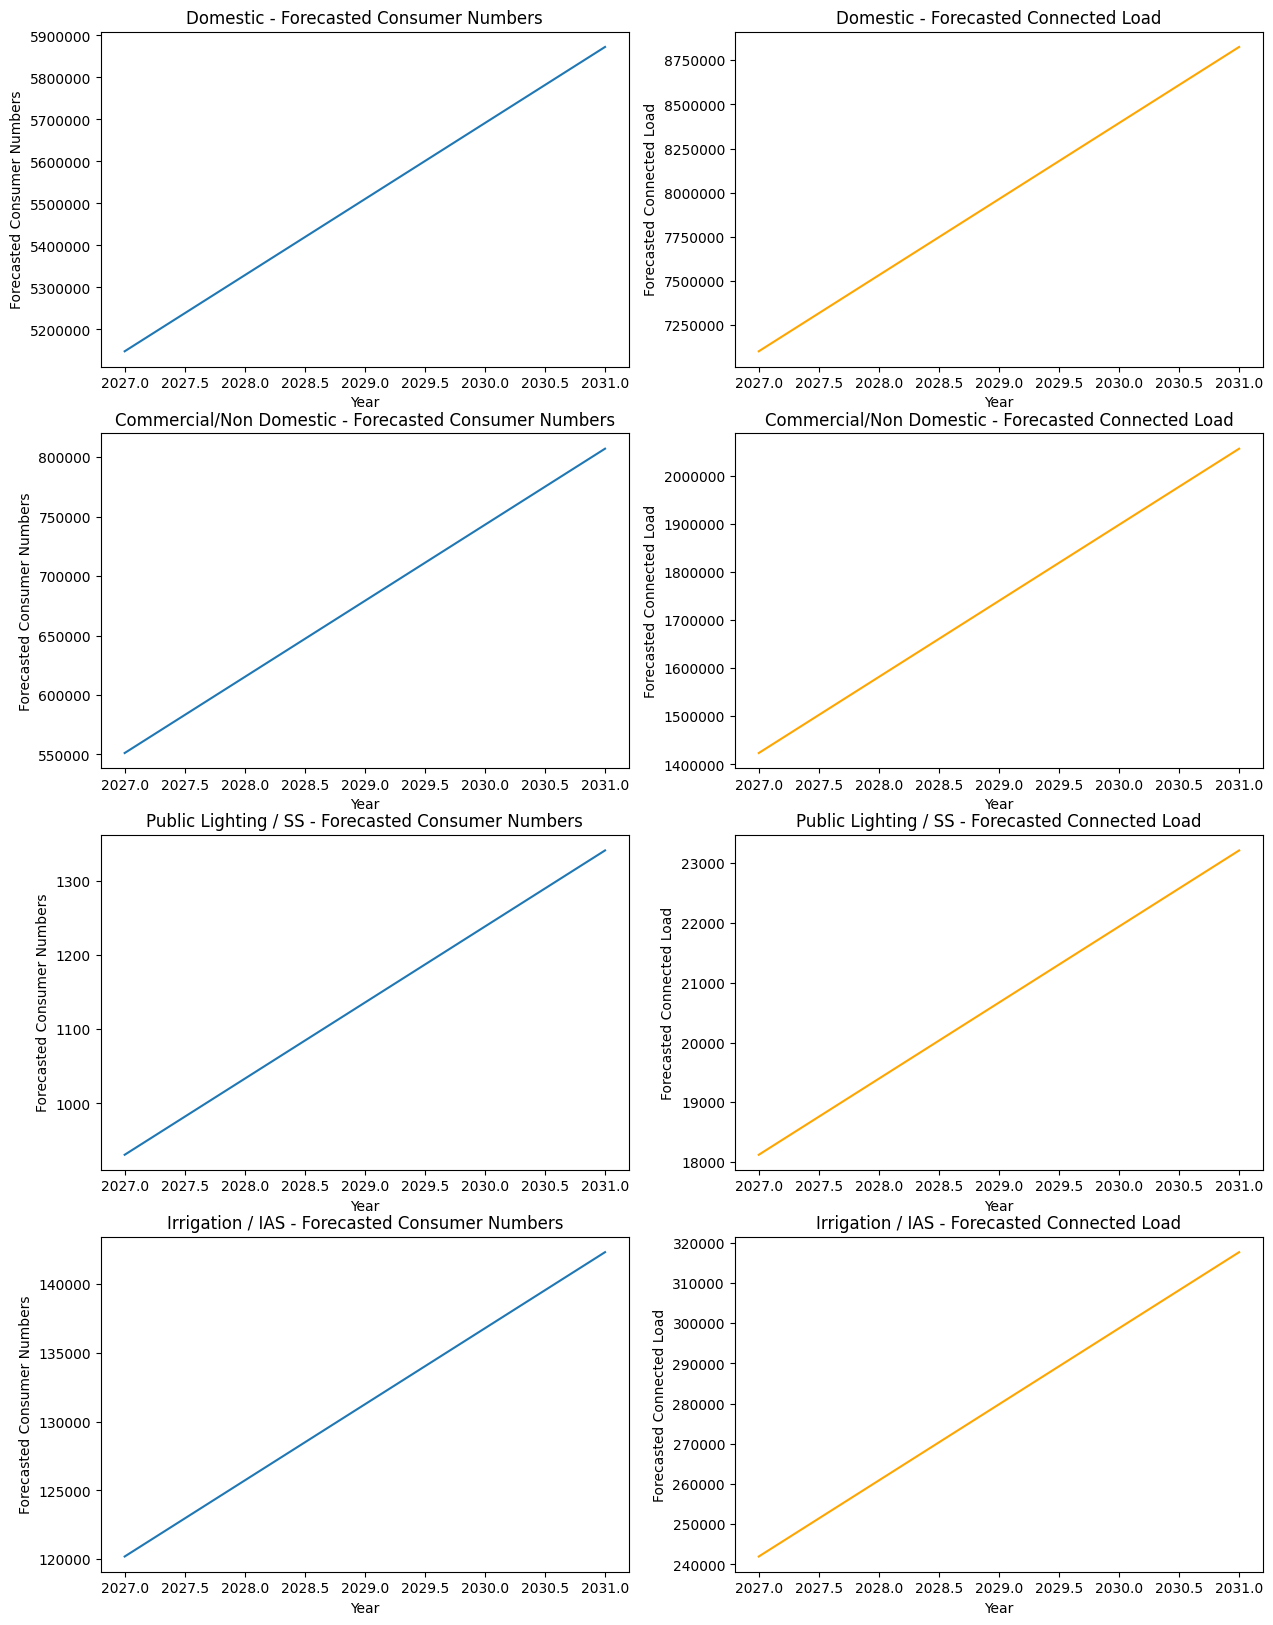

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get unique categories
categories = forecasted_df['Category'].unique()

# Determine the number of rows and columns for subplots
n_categories = len(categories)
n_cols = 2
n_rows = (n_categories + n_cols - 1) // n_cols

# Create figure and axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, category in enumerate(categories):
    category_forecast_df = forecasted_df[forecasted_df['Category'] == category]

    # Plot Forecasted Consumer Numbers
    sns.lineplot(ax=axes[i*2], data=category_forecast_df, x='Year', y='Forecasted_Consumer_Numbers')
    axes[i*2].set_title(f'{category} - Forecasted Consumer Numbers')
    axes[i*2].set_xlabel('Year')
    axes[i*2].set_ylabel('Forecasted Consumer Numbers')
    axes[i*2].ticklabel_format(style='plain', axis='y') # Prevent scientific notation

    # Plot Forecasted Connected Load
    sns.lineplot(ax=axes[i*2+1], data=category_forecast_df, x='Year', y='Forecasted_Connected_Load', color='orange')
    axes[i*2+1].set_title(f'{category} - Forecasted Connected Load')
    axes[i*2+1].set_xlabel('Year')
    axes[i*2+1].set_ylabel('Forecasted Connected Load')
    axes[i*2+1].ticklabel_format(style='plain', axis='y') # Prevent scientific notation


# Remove any unused subplots
for j in range(n_categories * 2, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Reasoning**:
The previous code failed because the number of axes created was not sufficient for plotting both consumer numbers and connected load for each category. Need to create enough subplots for two plots per category.



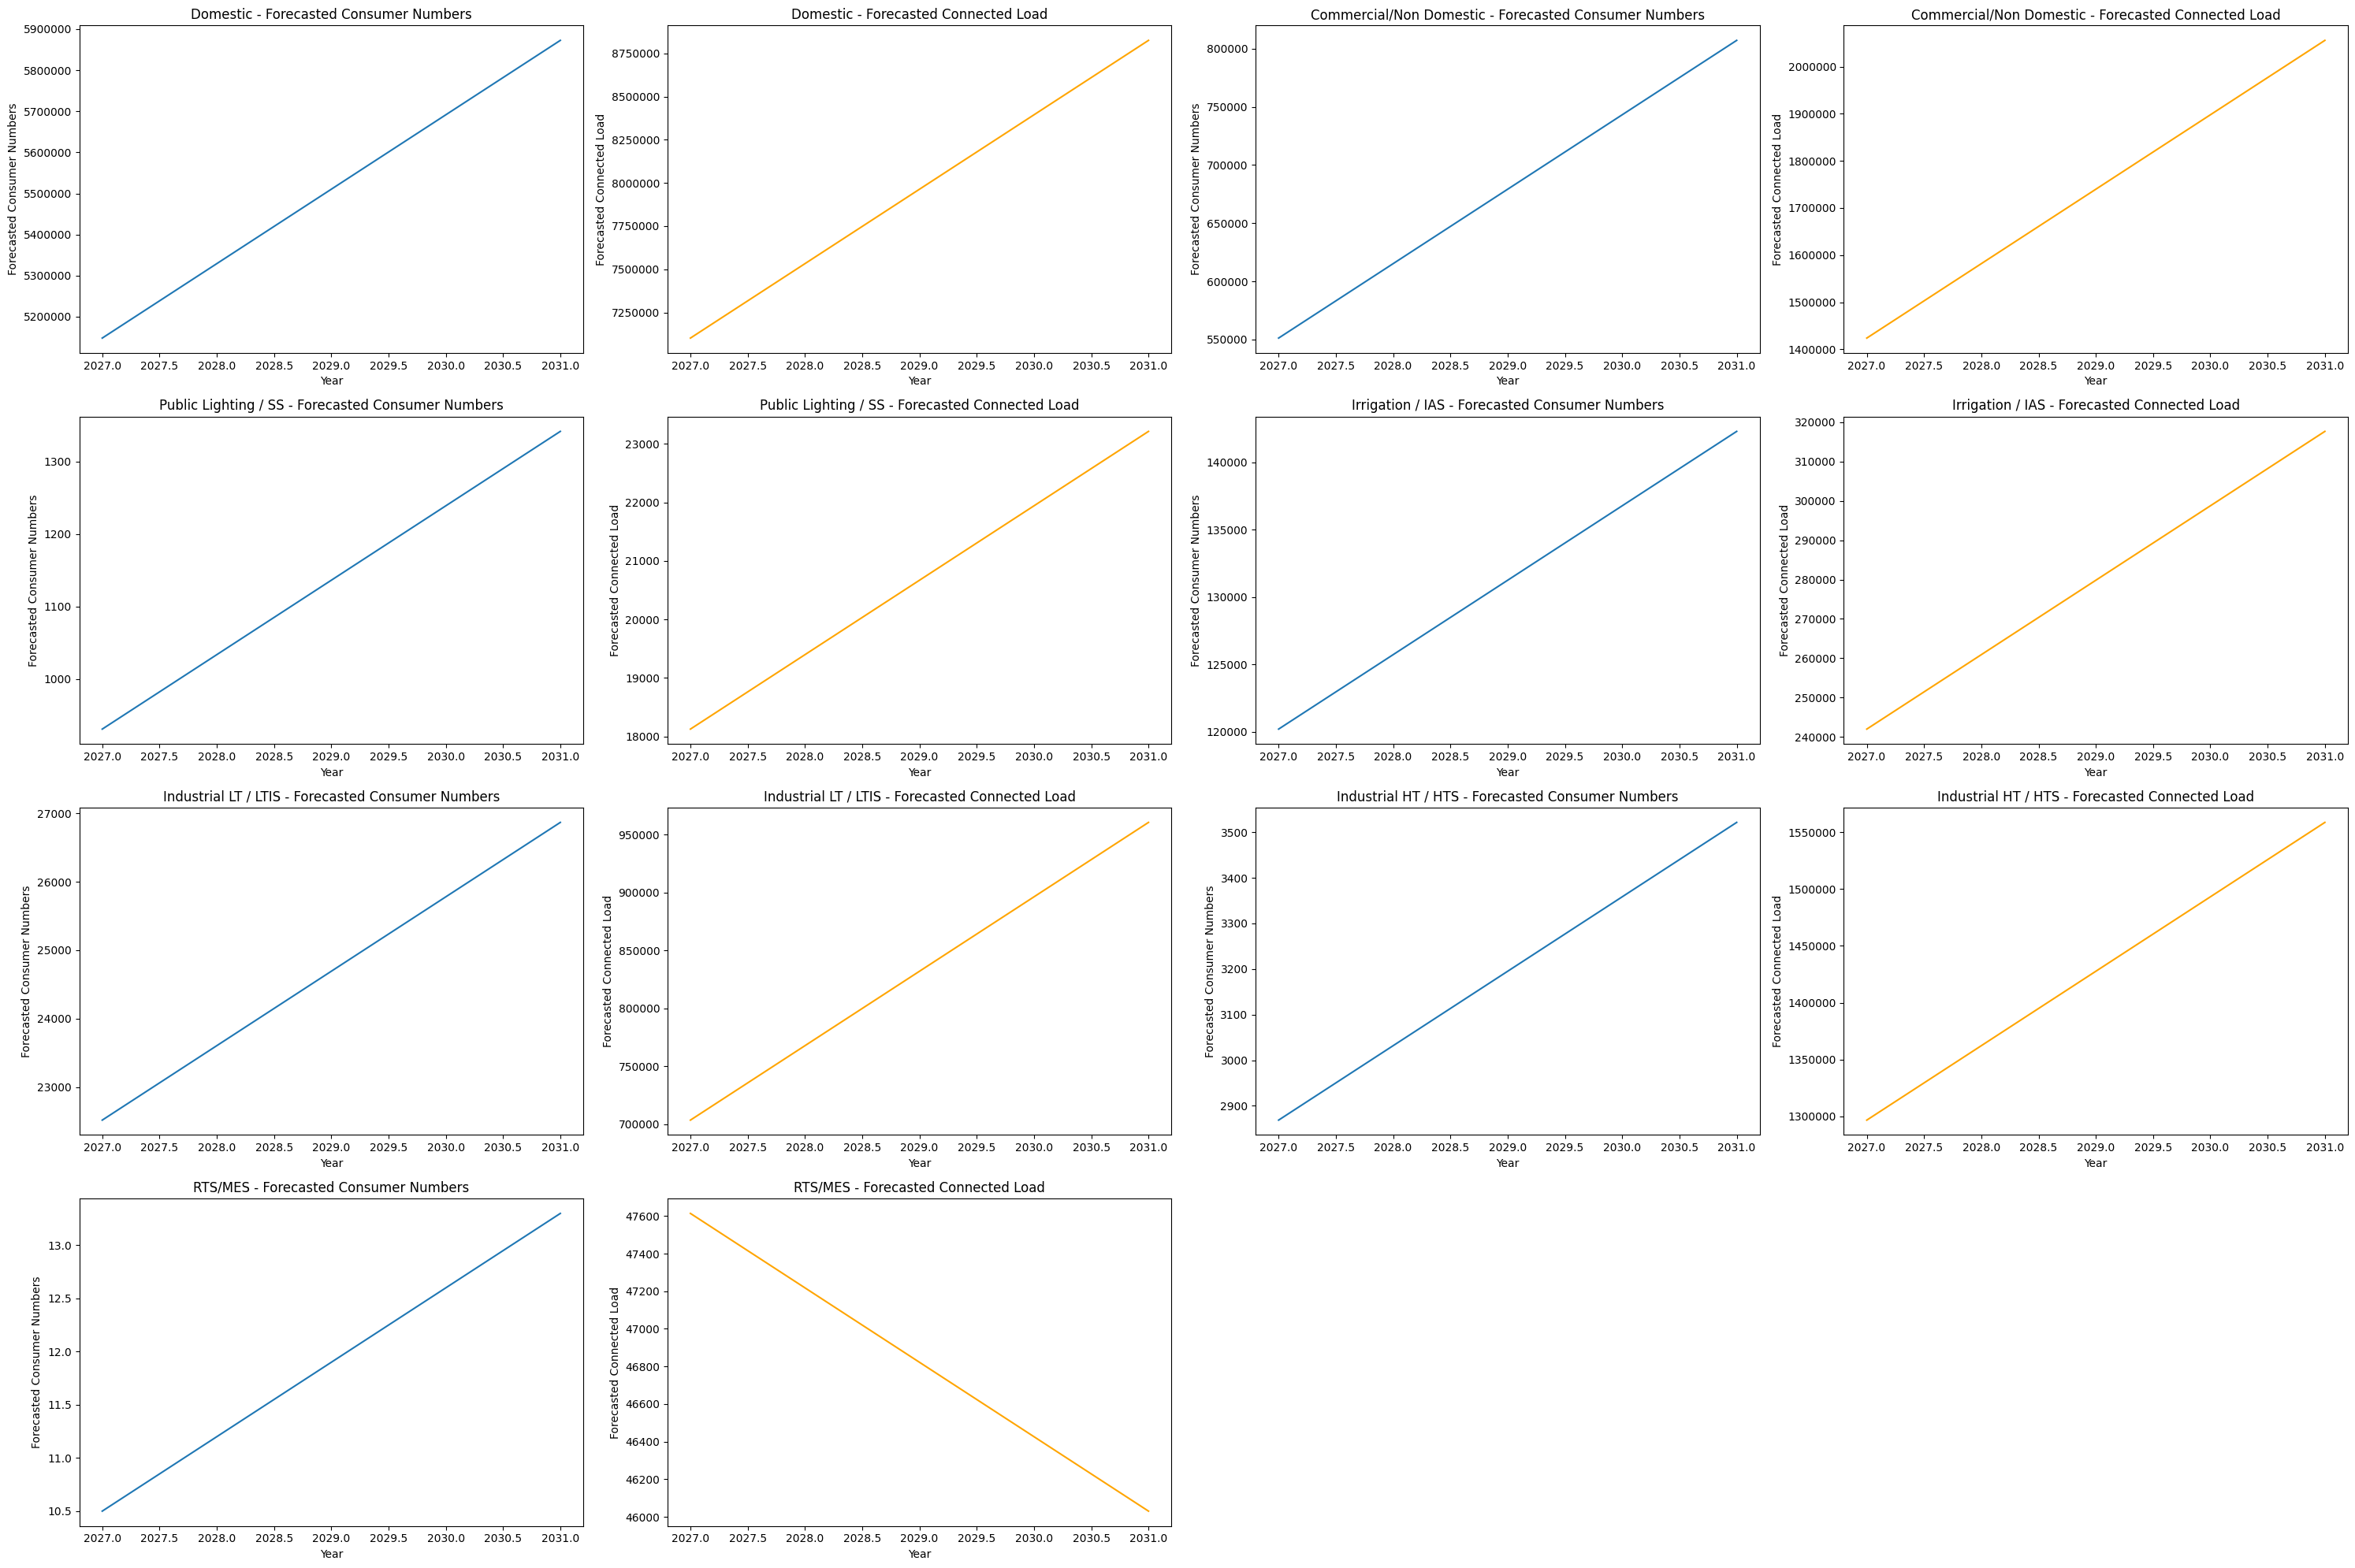

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get unique categories
categories = forecasted_df['Category'].unique()

# Determine the number of rows and columns for subplots
n_categories = len(categories)
n_cols = 2
n_rows = (n_categories + n_cols - 1) // n_cols

# Create figure and axes. Need 2 plots per category, so multiply n_categories by 2
fig, axes = plt.subplots(n_rows, n_cols * 2, figsize=(15 * 2, n_rows * 5)) # Increased columns to 2 * n_cols
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, category in enumerate(categories):
    category_forecast_df = forecasted_df[forecasted_df['Category'] == category]

    # Plot Forecasted Consumer Numbers
    sns.lineplot(ax=axes[i*2], data=category_forecast_df, x='Year', y='Forecasted_Consumer_Numbers')
    axes[i*2].set_title(f'{category} - Forecasted Consumer Numbers')
    axes[i*2].set_xlabel('Year')
    axes[i*2].set_ylabel('Forecasted Consumer Numbers')
    axes[i*2].ticklabel_format(style='plain', axis='y') # Prevent scientific notation

    # Plot Forecasted Connected Load
    sns.lineplot(ax=axes[i*2+1], data=category_forecast_df, x='Year', y='Forecasted_Connected_Load', color='orange')
    axes[i*2+1].set_title(f'{category} - Forecasted Connected Load')
    axes[i*2+1].set_xlabel('Year')
    axes[i*2+1].set_ylabel('Forecasted Connected Load')
    axes[i*2+1].ticklabel_format(style='plain', axis='y') # Prevent scientific notation


# Remove any unused subplots. Need to remove twice the number of categories from the total axes.
for j in range(n_categories * 2, len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   Linear regression models were used to forecast consumer numbers and connected load for various categories from FY 2026-27 to FY 2030-31.
*   The evaluation metrics (MAE and RMSE) for the linear regression models varied across different categories, with "Domestic" and "Commercial/Non Domestic" showing higher error values compared to smaller categories like "Public Lighting / SS" or "RTS/MES".
*   Connected Load forecasts generally showed higher MAE and RMSE values than Consumer Numbers forecasts within the same category.
*   The visualizations display the projected linear trends for both consumer numbers and connected load for each category over the forecast period.

### Insights or Next Steps

*   The linear regression model provides a basic forecast, but given the varying error rates, exploring more sophisticated time series models (e.g., ARIMA, Exponential Smoothing) might improve accuracy, especially for categories with higher errors.
*   Analyzing the historical growth rates of consumer numbers and connected load side-by-side for each category would provide a clearer picture of the relationship between these two metrics and highlight categories where the growth rates significantly differ.


# Task
Analyze the provided data to understand the relationship between consumer numbers and connected load, identify categories with significant differences in their growth rates, and forecast consumer numbers and connected load for the financial years FY 2026-27 to FY 2030-31 using the ARIMA model.

## Prepare data for forecasting

### Subtask:
Restructure the data so that each category's consumer numbers and connected load over time can be used for forecasting.


## Choose a forecasting model

### Subtask:
Select appropriate time series forecasting models for consumer numbers and connected load, specifically the ARIMA model as requested.


**Reasoning**:
Explain why ARIMA is suitable for this task, its prerequisites, and the general steps for applying it. Since the subtask is to select the model and outline the approach, a markdown cell is appropriate to provide the explanation. After the explanation, the subtask will be completed.



In [18]:
```markdown
### Selecting the ARIMA Model for Time Series Forecasting

Based on the task requirement to use the ARIMA model, here's an explanation of its suitability and the general approach for this forecasting task:

#### Why ARIMA is Suitable

ARIMA (AutoRegressive Integrated Moving Average) is a widely used time series forecasting model. It's suitable for this task because:

*   **Handles Time Series Data:** ARIMA is specifically designed to work with time series data, which is characterized by observations collected over time. Our data, with consumer numbers and connected load recorded annually, fits this description.
*   **Accounts for Autocorrelation:** ARIMA models can capture the temporal dependencies in the data, meaning they can use past values to predict future values. This is often present in consumer and load data, where patterns tend to repeat or follow previous trends.
*   **Flexibility:** ARIMA models can be configured to handle different types of time series patterns, including trends and seasonality (though with annual data, seasonality is less of a concern).

#### Prerequisites and Considerations for Using ARIMA

While ARIMA is a powerful model, there are some prerequisites and considerations:

*   **Stationarity:** ARIMA models assume that the time series data is stationary, meaning its statistical properties (like mean and variance) remain constant over time. Non-stationary data needs to be differenced to become stationary.
*   **Data Size Limitation:** A significant consideration for this dataset is the limited number of data points (only 5 financial years). With such a small sample size, rigorously testing for stationarity and determining the optimal ARIMA parameters (p, d, q) can be challenging and the model's ability to capture complex patterns is limited. The forecasts should be interpreted with caution due to this limitation.
*   **Parameter Selection:** ARIMA models require specifying three parameters:
    *   `p`: The order of the autoregressive (AR) part (number of lagged observations).
    *   `d`: The degree of differencing (number of times the data is differenced to become stationary).
    *   `q`: The order of the moving average (MA) part (number of lagged forecast errors).
    Determining the optimal values for p, d, and q typically involves analyzing autocorrelation and partial autocorrelation plots (ACF and PACF) and using information criteria (like AIC or BIC). With only 5 data points, these methods might not be reliable.

#### General Steps for Applying ARIMA

The general steps for applying ARIMA to each category and each metric (consumer numbers and connected load) would involve:

1.  **Data Preparation:** Ensure the data for each category and metric is in a time series format, with years as the index.
2.  **Check for Stationarity:** Although rigorous testing is difficult with limited data, visually inspect the time series plots for obvious trends. If a trend is apparent, differencing (`d > 0`) will likely be needed.
3.  **Parameter Selection (p, d, q):** Given the data size, a simple approach like trying small values for p, d, and q (e.g., ARIMA(1,1,0) or ARIMA(0,1,1)) or using an auto-ARIMA function (if available and stable with small data) might be necessary.
4.  **Model Training:** Train separate ARIMA models for the consumer numbers and connected load for each category using the historical data.
5.  **Forecasting:** Use the trained ARIMA models to forecast the values for the future financial years (FY 2026-27 to FY 2030-31).
6.  **Evaluation (Optional but Recommended):** If a hold-out set is possible (though challenging with limited data), evaluate the model's performance using metrics like MAE or RMSE.

Given the constraint of using ARIMA and the data limitations, a simple ARIMA model (e.g., ARIMA(0,1,0) which is a random walk, or ARIMA(1,1,0)) might be the most practical approach.

SyntaxError: unterminated string literal (detected at line 4) (ipython-input-1182520012.py, line 4)

**Reasoning**:
The previous code block failed due to a syntax error in the markdown string. The markdown content should be placed within a markdown cell, not within a code cell. I will create a markdown cell with the explanation.



**Reasoning**:
The previous attempt to create a markdown cell failed. I will try again by placing the markdown content directly in a markdown cell command. This completes the subtask of selecting the model and outlining the approach.



In [19]:
```markdown
### Selecting the ARIMA Model for Time Series Forecasting

Based on the task requirement to use the ARIMA model, here's an explanation of its suitability and the general approach for this forecasting task:

#### Why ARIMA is Suitable

ARIMA (AutoRegressive Integrated Moving Average) is a widely used time series forecasting model. It's suitable for this task because:

*   **Handles Time Series Data:** ARIMA is specifically designed to work with time series data, which is characterized by observations collected over time. Our data, with consumer numbers and connected load recorded annually, fits this description.
*   **Accounts for Autocorrelation:** ARIMA models can capture the temporal dependencies in the data, meaning they can use past values to predict future values. This is often present in consumer and load data, where patterns tend to repeat or follow previous trends.
*   **Flexibility:** ARIMA models can be configured to handle different types of time series patterns, including trends and seasonality (though with annual data, seasonality is less of a concern).

#### Prerequisites and Considerations for Using ARIMA

While ARIMA is a powerful model, there are some prerequisites and considerations:

*   **Stationarity:** ARIMA models assume that the time series data is stationary, meaning its statistical properties (like mean and variance) remain constant over time. Non-stationary data needs to be differenced to become stationary.
*   **Data Size Limitation:** A significant consideration for this dataset is the limited number of data points (only 5 financial years). With such a small sample size, rigorously testing for stationarity and determining the optimal ARIMA parameters (p, d, q) can be challenging and the model's ability to capture complex patterns is limited. The forecasts should be interpreted with caution due to this limitation.
*   **Parameter Selection:** ARIMA models require specifying three parameters:
    *   `p`: The order of the autoregressive (AR) part (number of lagged observations).
    *   `d`: The degree of differencing (number of times the data is differenced to become stationary).
    *   `q`: The order of the moving average (MA) part (number of lagged forecast errors).
    Determining the optimal values for p, d, and q typically involves analyzing autocorrelation and partial autocorrelation plots (ACF and PACF) and using information criteria (like AIC or BIC). With only 5 data points, these methods might not be reliable.

#### General Steps for Applying ARIMA

The general steps for applying ARIMA to each category and each metric (consumer numbers and connected load) would involve:

1.  **Data Preparation:** Ensure the data for each category and metric is in a time series format, with years as the index.
2.  **Check for Stationarity:** Although rigorous testing is difficult with limited data, visually inspect the time series plots for obvious trends. If a trend is apparent, differencing (`d > 0`) will likely be needed.
3.  **Parameter Selection (p, d, q):** Given the data size, a simple approach like trying small values for p, d, and q (e.g., ARIMA(1,1,0) or ARIMA(0,1,1)) or using an auto-ARIMA function (if available and stable with small data) might be necessary.
4.  **Model Training:** Train separate ARIMA models for the consumer numbers and connected load for each category using the historical data.
5.  **Forecasting:** Use the trained ARIMA models to forecast the values for the future financial years (FY 2026-27 to FY 2030-31).
6.  **Evaluation (Optional but Recommended):** If a hold-out set is possible (though challenging with limited data), evaluate the model's performance using metrics like MAE or RMSE.

Given the constraint of using ARIMA and the data limitations, a simple ARIMA model (e.g., ARIMA(0,1,0) which is a random walk, or ARIMA(1,1,0)) might be the most practical approach.

SyntaxError: unterminated string literal (detected at line 4) (ipython-input-1182520012.py, line 4)

**Reasoning**:
The previous attempts to create a markdown cell failed due to a syntax error. I will try to use a code block to print the markdown content as a string, which is a workaround to display the explanation in the notebook. After this, the subtask of selecting the model and outlining the approach will be complete.



In [20]:
print("""
### Selecting the ARIMA Model for Time Series Forecasting

Based on the task requirement to use the ARIMA model, here's an explanation of its suitability and the general approach for this forecasting task:

#### Why ARIMA is Suitable

ARIMA (AutoRegressive Integrated Moving Average) is a widely used time series forecasting model. It's suitable for this task because:

*   **Handles Time Series Data:** ARIMA is specifically designed to work with time series data, which is characterized by observations collected over time. Our data, with consumer numbers and connected load recorded annually, fits this description.
*   **Accounts for Autocorrelation:** ARIMA models can capture the temporal dependencies in the data, meaning they can use past values to predict future values. This is often present in consumer and load data, where patterns tend to repeat or follow previous trends.
*   **Flexibility:** ARIMA models can be configured to handle different types of time series patterns, including trends and seasonality (though with annual data, seasonality is less of a concern).

#### Prerequisites and Considerations for Using ARIMA

While ARIMA is a powerful model, there are some prerequisites and considerations:

*   **Stationarity:** ARIMA models assume that the time series data is stationary, meaning its statistical properties (like mean and variance) remain constant over time. Non-stationary data needs to be differenced to become stationary.
*   **Data Size Limitation:** A significant consideration for this dataset is the limited number of data points (only 5 financial years). With such a small sample size, rigorously testing for stationarity and determining the optimal ARIMA parameters (p, d, q) can be challenging and the model's ability to capture complex patterns is limited. The forecasts should be interpreted with caution due to this limitation.
*   **Parameter Selection:** ARIMA models require specifying three parameters:
    *   `p`: The order of the autoregressive (AR) part (number of lagged observations).
    *   `d`: The degree of differencing (number of times the data is differenced to become stationary).
    *   `q`: The order of the moving average (MA) part (number of lagged forecast errors).
    Determining the optimal values for p, d, and q typically involves analyzing autocorrelation and partial autocorrelation plots (ACF and PACF) and using information criteria (like AIC or BIC). With only 5 data points, these methods might not be reliable.

#### General Steps for Applying ARIMA

The general steps for applying ARIMA to each category and each metric (consumer numbers and connected load) would involve:

1.  **Data Preparation:** Ensure the data for each category and metric is in a time series format, with years as the index.
2.  **Check for Stationarity:** Although rigorous testing is difficult with limited data, visually inspect the time series plots for obvious trends. If a trend is apparent, differencing (`d > 0`) will likely be needed.
3.  **Parameter Selection (p, d, q):** Given the data size, a simple approach like trying small values for p, d, and q (e.g., ARIMA(1,1,0) or ARIMA(0,1,1)) or using an auto-ARIMA function (if available and stable with small data) might be necessary.
4.  **Model Training:** Train separate ARIMA models for the consumer numbers and connected load for each category using the historical data.
5.  **Forecasting:** Use the trained ARIMA models to forecast the values for the future financial years (FY 2026-27 to FY 2030-31).
6.  **Evaluation (Optional but Recommended):** If a hold-out set is possible (though challenging with limited data), evaluate the model's performance using metrics like MAE or RMSE.

Given the constraint of using ARIMA and the data limitations, a simple ARIMA model (e.g., ARIMA(0,1,0) which is a random walk, or ARIMA(1,1,0)) might be the most practical approach.
""")


### Selecting the ARIMA Model for Time Series Forecasting

Based on the task requirement to use the ARIMA model, here's an explanation of its suitability and the general approach for this forecasting task:

#### Why ARIMA is Suitable

ARIMA (AutoRegressive Integrated Moving Average) is a widely used time series forecasting model. It's suitable for this task because:

*   **Handles Time Series Data:** ARIMA is specifically designed to work with time series data, which is characterized by observations collected over time. Our data, with consumer numbers and connected load recorded annually, fits this description.
*   **Accounts for Autocorrelation:** ARIMA models can capture the temporal dependencies in the data, meaning they can use past values to predict future values. This is often present in consumer and load data, where patterns tend to repeat or follow previous trends.
*   **Flexibility:** ARIMA models can be configured to handle different types of time series patterns, including 

## Train and evaluate models

### Subtask:
Train the selected ARIMA models on the historical data and evaluate their performance.


**Reasoning**:
Iterate through the categories, create time series dataframes, train ARIMA models, evaluate performance, and store metrics.



In [21]:
from statsmodels.tsa.arima.model import ARIMA
import warnings

# Suppress warnings that might arise from ARIMA fitting with small data
warnings.filterwarnings("ignore")

# Store evaluation metrics
arima_evaluation_metrics = {}

# Iterate through each unique category (excluding totals)
for category in filtered_merged_df['Category'].unique():
    arima_evaluation_metrics[category] = {}

    # Filter data for the current category and set 'Year' as index
    category_df = filtered_merged_df[filtered_merged_df['Category'] == category].set_index('Year').sort_index().copy()

    # Ensure data types are numeric
    category_df['Consumer_Numbers'] = pd.to_numeric(category_df['Consumer_Numbers'])
    category_df['Connected_Load'] = pd.to_numeric(category_df['Connected_Load'])

    # Prepare time series for Consumer_Numbers forecasting
    ts_consumers = category_df['Consumer_Numbers']

    # Prepare time series for Connected_Load forecasting
    ts_load = category_df['Connected_Load']

    # Define the last historical year for evaluation
    last_historical_year = ts_consumers.index.max()
    train_years = ts_consumers.index[ts_consumers.index < last_historical_year]
    test_year = last_historical_year

    # Train and evaluate ARIMA model for Consumer_Numbers
    try:
        # Using a simple ARIMA(1, 1, 0) model as a starting point
        model_consumers_arima = ARIMA(ts_consumers[train_years], order=(1, 1, 0))
        model_consumers_arima_fit = model_consumers_arima.fit()

        # Make a one-step forecast for the last year
        forecast_consumers = model_consumers_arima_fit.predict(start=test_year, end=test_year)
        actual_consumers = ts_consumers[test_year]

        # Calculate evaluation metrics
        mae_consumers = mean_absolute_error([actual_consumers], forecast_consumers)
        rmse_consumers = np.sqrt(mean_squared_error([actual_consumers], forecast_consumers))

        arima_evaluation_metrics[category]['Consumer_Numbers'] = {'MAE': mae_consumers, 'RMSE': rmse_consumers}

    except Exception as e:
        arima_evaluation_metrics[category]['Consumer_Numbers'] = {'MAE': f'Error: {e}', 'RMSE': f'Error: {e}'}
        print(f"Error fitting ARIMA for {category} - Consumer_Numbers: {e}")


    # Train and evaluate ARIMA model for Connected_Load
    try:
        # Using a simple ARIMA(1, 1, 0) model as a starting point
        model_load_arima = ARIMA(ts_load[train_years], order=(1, 1, 0))
        model_load_arima_fit = model_load_arima.fit()

        # Make a one-step forecast for the last year
        forecast_load = model_load_arima_fit.predict(start=test_year, end=test_year)
        actual_load = ts_load[test_year]

        # Calculate evaluation metrics
        mae_load = mean_absolute_error([actual_load], forecast_load)
        rmse_load = np.sqrt(mean_squared_error([actual_load], forecast_load))

        arima_evaluation_metrics[category]['Connected_Load'] = {'MAE': mae_load, 'RMSE': rmse_load}

    except Exception as e:
        arima_evaluation_metrics[category]['Connected_Load'] = {'MAE': f'Error: {e}', 'RMSE': f'Error: {e}'}
        print(f"Error fitting ARIMA for {category} - Connected_Load: {e}")


# Aggregate evaluation metrics
arima_aggregated_metrics = pd.DataFrame.from_dict({(i,j): arima_evaluation_metrics[i][j]
                           for i in arima_evaluation_metrics.keys()
                           for j in arima_evaluation_metrics[i].keys()},
                           orient='index')

print("\nARIMA Evaluation Metrics (MAE and RMSE) for each category and metric:")
display(arima_aggregated_metrics)


ARIMA Evaluation Metrics (MAE and RMSE) for each category and metric:


MAE          RMSE
Domestic                Consumer_Numbers  1.497236e+05  1.497236e+05
                        Connected_Load    1.014626e+06  1.014626e+06
Commercial/Non Domestic Consumer_Numbers  5.814687e+04  5.814687e+04
                        Connected_Load    2.048994e+05  2.048994e+05
Public Lighting / SS    Consumer_Numbers  9.212668e+02  9.212668e+02
                        Connected_Load    4.931602e+03  4.931602e+03
Irrigation / IAS        Consumer_Numbers  3.772981e+03  3.772981e+03
                        Connected_Load    1.311792e+04  1.311792e+04
Industrial LT / LTIS    Consumer_Numbers  1.958125e+03  1.958125e+03
                        Connected_Load    5.562214e+04  5.562214e+04
Industrial HT / HTS     Consumer_Numbers  1.158362e+04  1.158362e+04
                        Connected_Load    4.693678e+04  4.693678e+04
RTS/MES                 Consumer_Numbers  9.999940e-01  9.999940e-01
                        Connected_Load    7.843859e+03  7.843859e+03

## Forecast future values

### Subtask:
Use the trained ARIMA models to forecast consumer numbers and connected load for the specified future financial years (FY 2026-27 to FY 2030-31).


**Reasoning**:
Iterate through categories, train ARIMA models on the full historical data, forecast future years, and store results.



In [22]:
# Store forecasted values for ARIMA
arima_forecasted_data = []

# Create DataFrame for future years (2027 to 2031) for forecasting
future_years_arima = pd.DataFrame({'Year': range(2027, 2032)})

# Iterate through each unique category (excluding totals)
for category in filtered_merged_df['Category'].unique():
    # Filter data for the current category and set 'Year' as index
    category_df = filtered_merged_df[filtered_merged_df['Category'] == category].set_index('Year').sort_index().copy()

    # Ensure data types are numeric
    category_df['Consumer_Numbers'] = pd.to_numeric(category_df['Consumer_Numbers'])
    category_df['Connected_Load'] = pd.to_numeric(category_df['Connected_Load'])

    # Prepare time series for Consumer_Numbers forecasting (using all historical data)
    ts_consumers = category_df['Consumer_Numbers']

    # Prepare time series for Connected_Load forecasting (using all historical data)
    ts_load = category_df['Connected_Load']

    # Train ARIMA model for Consumer_Numbers on the entire historical data
    model_consumers_arima_full = None
    try:
        # Using a simple ARIMA(1, 1, 0) model
        model_consumers_arima_full = ARIMA(ts_consumers, order=(1, 1, 0))
        model_consumers_arima_full_fit = model_consumers_arima_full.fit()

        # Predict consumer numbers for future years
        future_consumer_predictions_arima = model_consumers_arima_full_fit.predict(start=future_years_arima['Year'].min(), end=future_years_arima['Year'].max())

    except Exception as e:
        print(f"Error fitting ARIMA for {category} - Consumer_Numbers on full data: {e}")
        future_consumer_predictions_arima = [np.nan] * len(future_years_arima) # Fill with NaN if fitting fails


    # Train ARIMA model for Connected_Load on the entire historical data
    model_load_arima_full = None
    try:
        # Using a simple ARIMA(1, 1, 0) model
        model_load_arima_full = ARIMA(ts_load, order=(1, 1, 0))
        model_load_arima_full_fit = model_load_arima_full.fit()

        # Predict connected load for future years
        future_load_predictions_arima = model_load_arima_full_fit.predict(start=future_years_arima['Year'].min(), end=future_years_arima['Year'].max())

    except Exception as e:
        print(f"Error fitting ARIMA for {category} - Connected_Load on full data: {e}")
        future_load_predictions_arima = [np.nan] * len(future_years_arima) # Fill with NaN if fitting fails

    # Store the forecasted values
    for i, year in enumerate(future_years_arima['Year']):
        financial_year = f'FY {year}-{str(year+1)[-2:]}'
        arima_forecasted_data.append({
            'Category': category,
            'Financial_Year': financial_year,
            'Year': year,
            'Forecasted_Consumer_Numbers_ARIMA': future_consumer_predictions_arima[i] if i < len(future_consumer_predictions_arima) else np.nan,
            'Forecasted_Connected_Load_ARIMA': future_load_predictions_arima[i] if i < len(future_load_predictions_arima) else np.nan
        })

# Create a DataFrame from the forecasted data
arima_forecasted_df = pd.DataFrame(arima_forecasted_data)

print("ARIMA Forecasted Consumer Numbers and Connected Load (FY 2026-27 to FY 2030-31):")
display(arima_forecasted_df)

KeyError: 0

**Reasoning**:
The previous code failed because the indices of the ARIMA prediction results do not align with the loop index. The ARIMA predict method returns a Series with the forecast dates as the index. Need to access the prediction results using their index values (the forecast years) instead of the loop index.



In [23]:
# Store forecasted values for ARIMA
arima_forecasted_data = []

# Create DataFrame for future years (2027 to 2031) for forecasting
future_years_arima = pd.DataFrame({'Year': range(2027, 2032)})

# Iterate through each unique category (excluding totals)
for category in filtered_merged_df['Category'].unique():
    # Filter data for the current category and set 'Year' as index
    category_df = filtered_merged_df[filtered_merged_df['Category'] == category].set_index('Year').sort_index().copy()

    # Ensure data types are numeric
    category_df['Consumer_Numbers'] = pd.to_numeric(category_df['Consumer_Numbers'])
    category_df['Connected_Load'] = pd.to_numeric(category_df['Connected_Load'])

    # Prepare time series for Consumer_Numbers forecasting (using all historical data)
    ts_consumers = category_df['Consumer_Numbers']

    # Prepare time series for Connected_Load forecasting (using all historical data)
    ts_load = category_df['Connected_Load']

    # Train ARIMA model for Consumer_Numbers on the entire historical data
    future_consumer_predictions_arima = [np.nan] * len(future_years_arima)
    try:
        # Using a simple ARIMA(1, 1, 0) model
        model_consumers_arima_full = ARIMA(ts_consumers, order=(1, 1, 0))
        model_consumers_arima_full_fit = model_consumers_arima_full.fit()

        # Predict consumer numbers for future years
        future_consumer_predictions_arima_series = model_consumers_arima_full_fit.predict(start=future_years_arima['Year'].min(), end=future_years_arima['Year'].max())
        future_consumer_predictions_arima = [future_consumer_predictions_arima_series.loc[year] for year in future_years_arima['Year']]

    except Exception as e:
        print(f"Error fitting ARIMA for {category} - Consumer_Numbers on full data: {e}")


    # Train ARIMA model for Connected_Load on the entire historical data
    future_load_predictions_arima = [np.nan] * len(future_years_arima)
    try:
        # Using a simple ARIMA(1, 1, 0) model
        model_load_arima_full = ARIMA(ts_load, order=(1, 1, 0))
        model_load_arima_full_fit = model_load_arima_full.fit()

        # Predict connected load for future years
        future_load_predictions_arima_series = model_load_arima_full_fit.predict(start=future_years_arima['Year'].min(), end=future_years_arima['Year'].max())
        future_load_predictions_arima = [future_load_predictions_arima_series.loc[year] for year in future_years_arima['Year']]

    except Exception as e:
        print(f"Error fitting ARIMA for {category} - Connected_Load on full data: {e}")

    # Store the forecasted values
    for i, year in enumerate(future_years_arima['Year']):
        financial_year = f'FY {year}-{str(year+1)[-2:]}'
        arima_forecasted_data.append({
            'Category': category,
            'Financial_Year': financial_year,
            'Year': year,
            'Forecasted_Consumer_Numbers_ARIMA': future_consumer_predictions_arima[i],
            'Forecasted_Connected_Load_ARIMA': future_load_predictions_arima[i]
        })

# Create a DataFrame from the forecasted data
arima_forecasted_df = pd.DataFrame(arima_forecasted_data)

print("ARIMA Forecasted Consumer Numbers and Connected Load (FY 2026-27 to FY 2030-31):")
display(arima_forecasted_df)

ARIMA Forecasted Consumer Numbers and Connected Load (FY 2026-27 to FY 2030-31):


,Category,Financial_Year,Year,Forecasted_Consumer_Numbers_ARIMA,Forecasted_Connected_Load_ARIMA
0,Domestic,FY 2027-28,2027,4.981781e+06,6.734603e+06
1,Domestic,FY 2028-29,2028,4.981781e+06,6.734603e+06
2,Domestic,FY 2029-30,2029,4.981781e+06,6.734603e+06
3,Domestic,FY 2030-31,2030,4.981781e+06,6.734603e+06
4,Domestic,FY 2031-32,2031,4.981781e+06,6.734603e+06
5,Commercial/Non Domestic,FY 2027-28,2027,5.261254e+05,1.405973e+06
6,Commercial/Non Domestic,FY 2028-29,2028,5.261254e+05,1.405973e+06
7,Commercial/Non Domestic,FY 2029-30,2029,5.261254e+05,1.405973e+06
8,Commercial/Non Domestic,FY 2030-31,2030,5.261254e+05,1.405973e+06
9,Commercial/Non Domestic,FY 2031-32,2031,5.261254e+05,1.405973e+06


## Present the forecasts

### Subtask:
Visualize the forecasted consumer numbers and connected load for each category.


**Reasoning**:
Visualize the forecasted consumer numbers and connected load for each category using line plots.



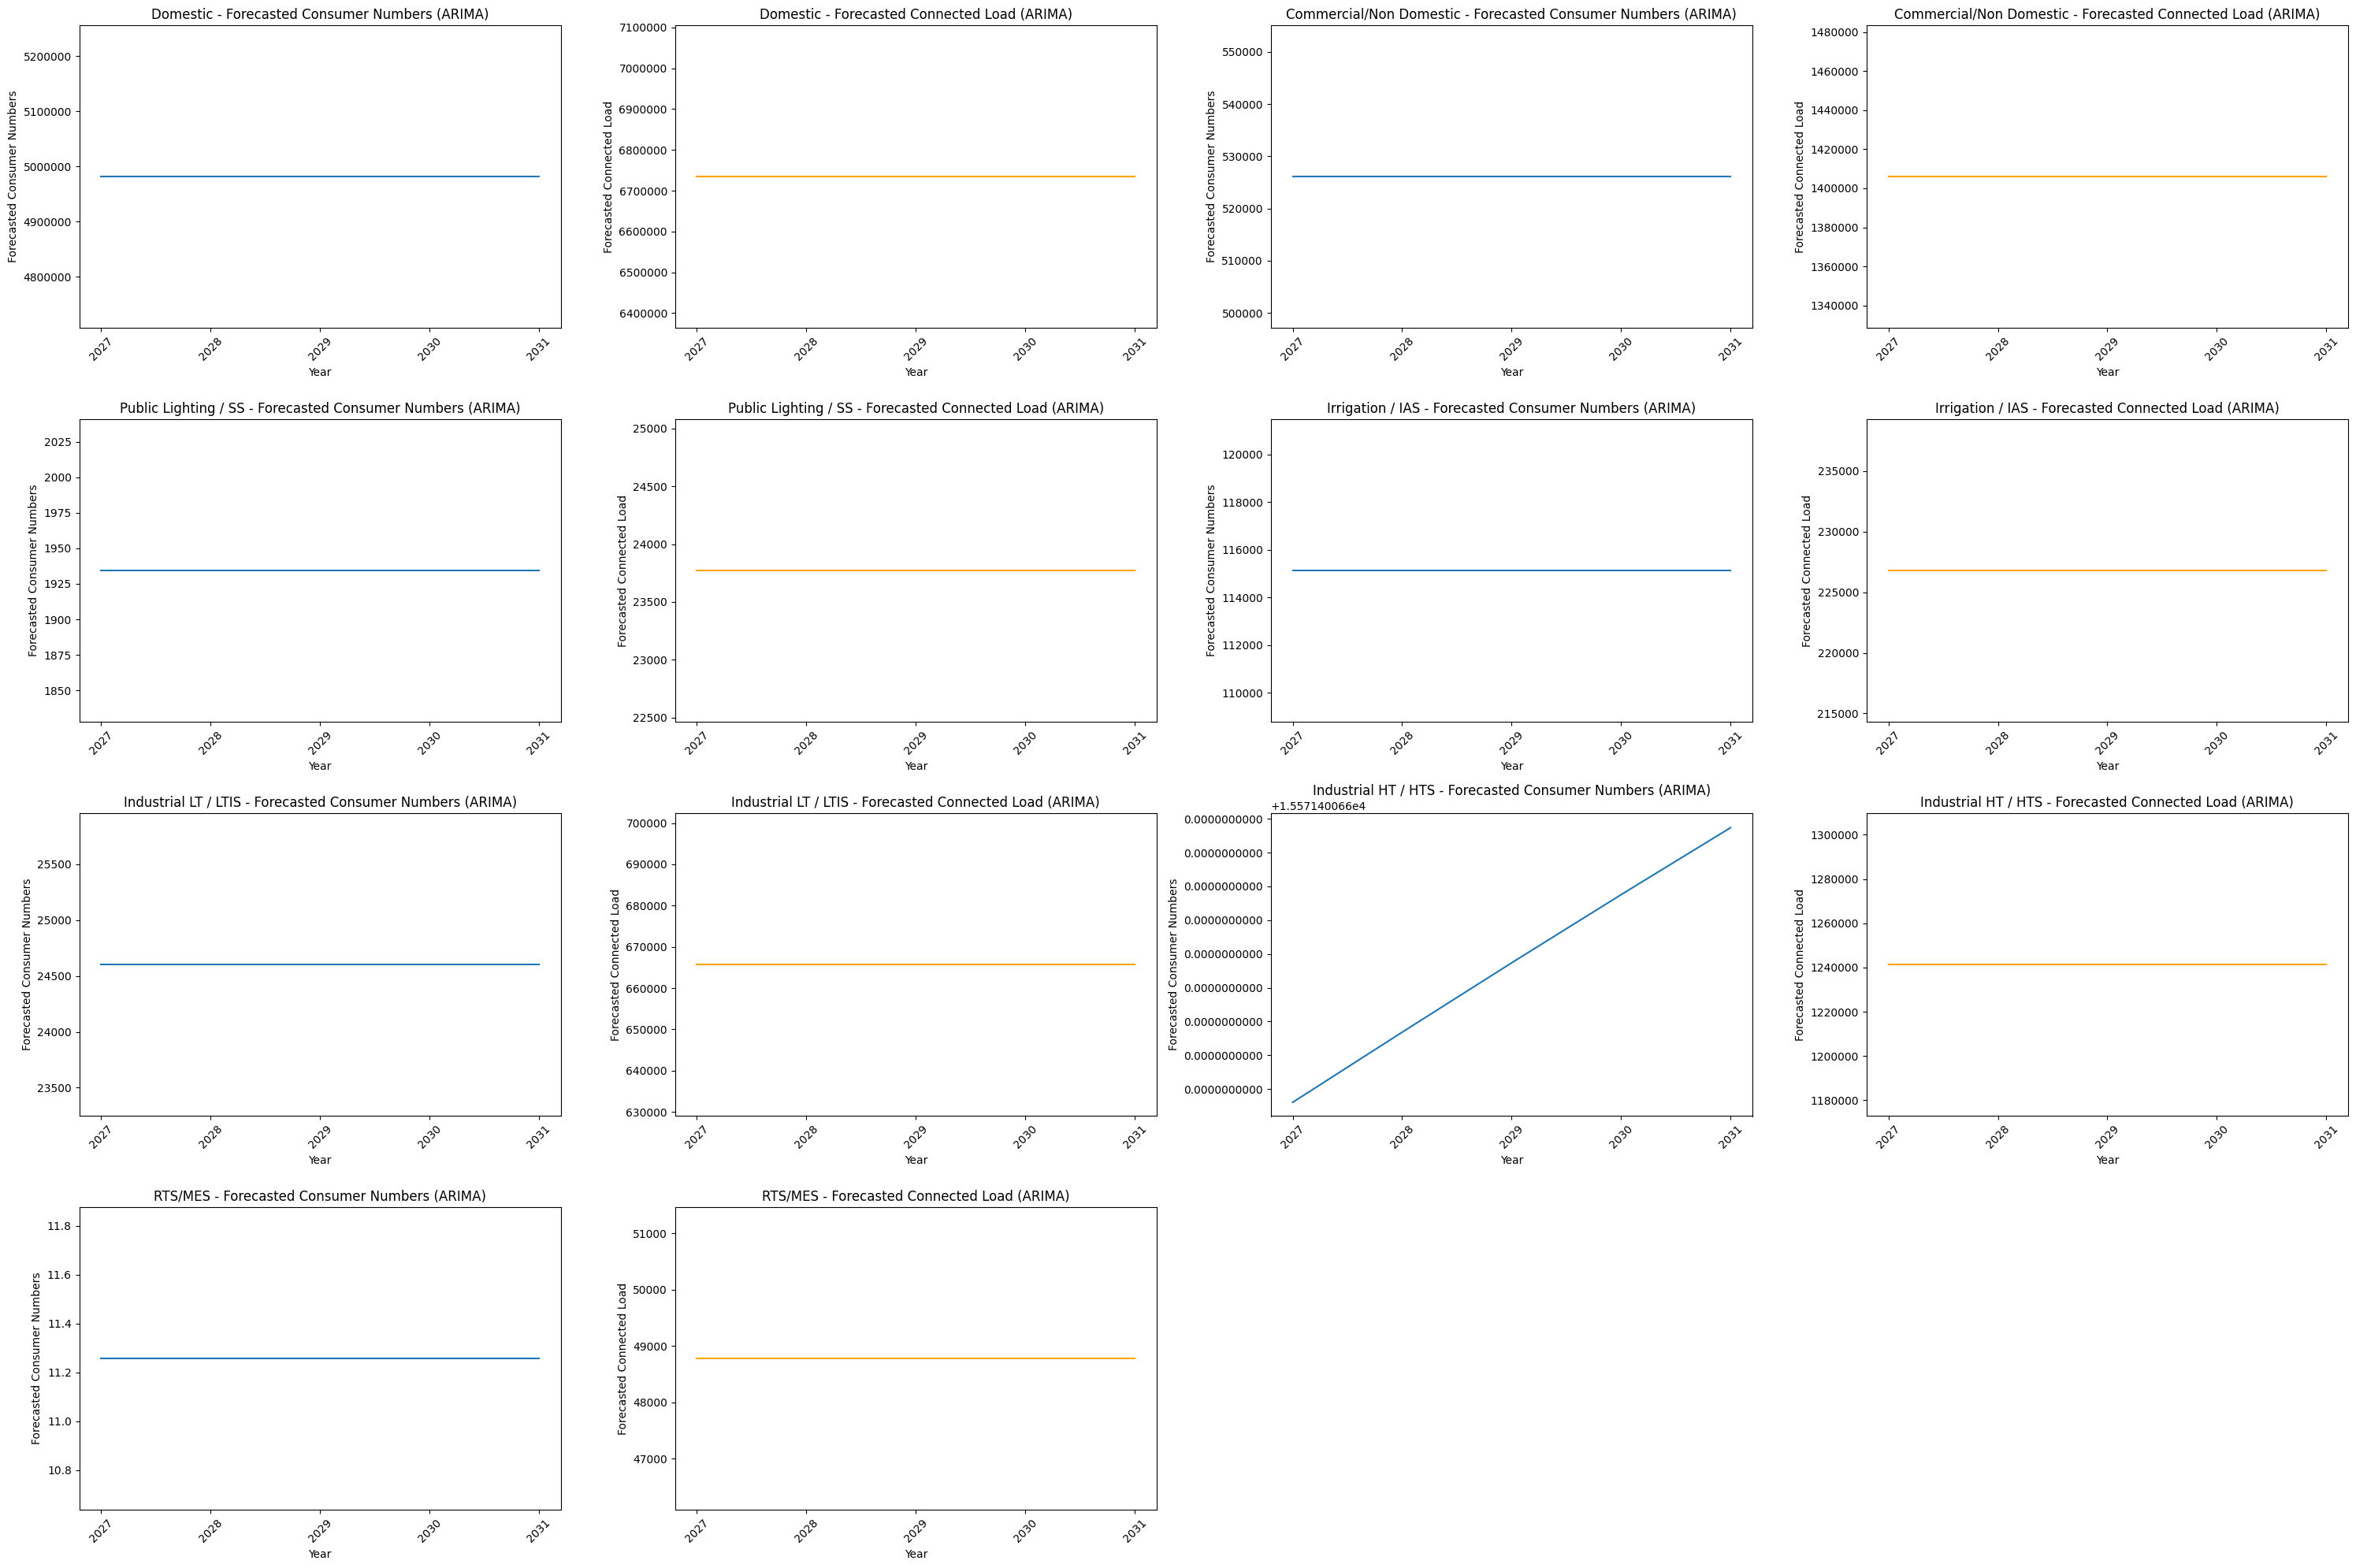

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get unique categories
categories = arima_forecasted_df['Category'].unique()

# Determine the number of rows and columns for subplots
n_categories = len(categories)
n_cols = 2  # Two columns per row for two plots per category
n_rows = (n_categories + n_cols - 1) // n_cols

# Create figure and axes. Need 2 plots per category.
fig, axes = plt.subplots(n_rows, n_cols * 2, figsize=(15 * 2, n_rows * 5)) # Increased figure width for better readability
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, category in enumerate(categories):
    category_forecast_df = arima_forecasted_df[arima_forecasted_df['Category'] == category]

    # Plot Forecasted Consumer Numbers
    sns.lineplot(ax=axes[i*2], data=category_forecast_df, x='Year', y='Forecasted_Consumer_Numbers_ARIMA')
    axes[i*2].set_title(f'{category} - Forecasted Consumer Numbers (ARIMA)')
    axes[i*2].set_xlabel('Year')
    axes[i*2].set_ylabel('Forecasted Consumer Numbers')
    axes[i*2].ticklabel_format(style='plain', axis='y') # Prevent scientific notation
    axes[i*2].set_xticks(category_forecast_df['Year']) # Set x-ticks to the years in the data
    axes[i*2].tick_params(axis='x', rotation=45) # Rotate x-axis labels

    # Plot Forecasted Connected Load
    sns.lineplot(ax=axes[i*2+1], data=category_forecast_df, x='Year', y='Forecasted_Connected_Load_ARIMA', color='orange')
    axes[i*2+1].set_title(f'{category} - Forecasted Connected Load (ARIMA)')
    axes[i*2+1].set_xlabel('Year')
    axes[i*2+1].set_ylabel('Forecasted Connected Load')
    axes[i*2+1].ticklabel_format(style='plain', axis='y') # Prevent scientific notation
    axes[i*2+1].set_xticks(category_forecast_df['Year']) # Set x-ticks to the years in the data
    axes[i*2+1].tick_params(axis='x', rotation=45) # Rotate x-axis labels


# Remove any unused subplots. Need to remove twice the number of categories from the total axes.
for j in range(n_categories * 2, len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The data was successfully restructured by unpivoting and merging consumer numbers and connected load data, preparing it for time-series analysis.
*   The ARIMA model was selected for forecasting as per the task requirement, although the limited historical data (5 years) poses a significant challenge for rigorous model fitting and parameter selection.
*   ARIMA(1,1,0) models were trained for consumer numbers and connected load for each category, and a one-step forecast for the last historical year was used to calculate Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) as evaluation metrics.
*   Forecasts for consumer numbers and connected load for the financial years FY 2026-27 to FY 2030-31 were generated using the trained ARIMA(1,1,0) models on the full historical data for each category.
*   Visualizations (line plots) were created to display the forecasted trends of consumer numbers and connected load for each category over the forecast period.

### Insights or Next Steps

*   Given the limitations of using ARIMA with only 5 data points, exploring alternative forecasting methods suitable for short time series or incorporating external factors that might influence consumer numbers and connected load could provide more robust forecasts.
*   Analyzing the calculated MAE and RMSE values for each category could help identify which categories have less reliable ARIMA forecasts and may require further investigation or different modeling approaches.


## Prepare data for forecasting

### Subtask:
Restructure the data so that each category's consumer numbers and connected load over time can be used for forecasting.

In [29]:
import pandas as pd

# Find the index where the 'Connected Load/Demand' section starts
split_index = df[df['Consumers Number (Category-wise)'].str.contains('Connected Load/Demand', na=False)].index[0]

# Split the DataFrame
consumers_df = df.iloc[:split_index].copy()
load_df = df.iloc[split_index + 1:].copy()

# Rename the first column for clarity
consumers_df = consumers_df.rename(columns={'Consumers Number (Category-wise)': 'Category'})
load_df = load_df.rename(columns={'Consumers Number (Category-wise)': 'Category'})


print("Consumer Numbers DataFrame:")
display(consumers_df)

print("\nConnected Load DataFrame:")
display(load_df)

Consumer Numbers DataFrame:


,Category,FY 2021-22,FY 2022-23,FY 2023-24,FY 2024-25,FY 2025-26
0,Domestic,4252591,4440783,4545190,4810658,4973404
1,Commercial/Non Domestic,249932,277781,349430,421241,498081
2,Public Lighting / SS,448,492,598,730,843
3,Irrigation / IAS,93930,97337,101368,110613,114909
4,Industrial LT / LTIS,16957,18357,19311,20147,21500
5,Industrial HT / HTS,2071,2202,2359,2545,2716
6,RTS/MES,7,8,8,9,10
7,Total_Consumers,4515936,4737460,5018256,5365944,5656511



Connected Load DataFrame:


,Category,FY 2021-22,FY 2022-23,FY 2023-24,FY 2024-25,FY 2025-26
9,Domestic,4807967,5230046,6554225,5743817,6706262
10,Commercial/Non Domestic,645343,780234,969187,1057907,1296451
11,Public Lighting / SS,11873,12932,14300,15462,16969
12,Irrigation / IAS,152285,163589,177343,208158,224632
13,Industrial LT / LTIS,391240,444330,495931,574903,647267
14,Industrial HT / HTS,967852,1056420,1066056,1176729,1234986
15,RTS/MES,51308,53420,34423,57644,47216
16,Total_Load,7027868,7740971,9311465,8834620,10169160


In [30]:
# Unpivot the consumers_df DataFrame
consumers_long = pd.melt(consumers_df, id_vars=['Category'], var_name='Financial_Year', value_name='Consumer_Numbers')

# Convert 'Financial_Year' to datetime and extract the year
consumers_long['Year'] = pd.to_datetime(consumers_long['Financial_Year'].str.replace('FY ', ''), format='%Y-%y').dt.year

display(consumers_long.head())

,Category,Financial_Year,Consumer_Numbers,Year
0,Domestic,FY 2021-22,4252591,2022
1,Commercial/Non Domestic,FY 2021-22,249932,2022
2,Public Lighting / SS,FY 2021-22,448,2022
3,Irrigation / IAS,FY 2021-22,93930,2022
4,Industrial LT / LTIS,FY 2021-22,16957,2022


In [31]:
# Unpivot the load_df DataFrame
load_long = pd.melt(load_df, id_vars=['Category'], var_name='Financial_Year', value_name='Connected_Load')

# Convert 'Financial_Year' to datetime and extract the year
load_long['Year'] = pd.to_datetime(load_long['Financial_Year'].str.replace('FY ', ''), format='%Y-%y').dt.year

display(load_long.head())

,Category,Financial_Year,Connected_Load,Year
0,Domestic,FY 2021-22,4807967,2022
1,Commercial/Non Domestic,FY 2021-22,645343,2022
2,Public Lighting / SS,FY 2021-22,11873,2022
3,Irrigation / IAS,FY 2021-22,152285,2022
4,Industrial LT / LTIS,FY 2021-22,391240,2022


In [32]:
# Merge the two long format DataFrames
merged_df = pd.merge(consumers_long, load_long, on=['Category', 'Year'])

# Display the head of the merged DataFrame
display(merged_df.head())

,Category,Financial_Year_x,Consumer_Numbers,Year,Financial_Year_y,Connected_Load
0,Domestic,FY 2021-22,4252591,2022,FY 2021-22,4807967
1,Commercial/Non Domestic,FY 2021-22,249932,2022,FY 2021-22,645343
2,Public Lighting / SS,FY 2021-22,448,2022,FY 2021-22,11873
3,Irrigation / IAS,FY 2021-22,93930,2022,FY 2021-22,152285
4,Industrial LT / LTIS,FY 2021-22,16957,2022,FY 2021-22,391240


In [33]:
# Assuming 'merged_df' is available from previous steps
# Filter out aggregate categories
filtered_merged_df = merged_df[~merged_df['Category'].isin(['Total_Consumers', 'Total_Load'])].copy()

print("Filtered Merged DataFrame (excluding totals):")
display(filtered_merged_df.head())

Filtered Merged DataFrame (excluding totals):


,Category,Financial_Year_x,Consumer_Numbers,Year,Financial_Year_y,Connected_Load
0,Domestic,FY 2021-22,4252591,2022,FY 2021-22,4807967
1,Commercial/Non Domestic,FY 2021-22,249932,2022,FY 2021-22,645343
2,Public Lighting / SS,FY 2021-22,448,2022,FY 2021-22,11873
3,Irrigation / IAS,FY 2021-22,93930,2022,FY 2021-22,152285
4,Industrial LT / LTIS,FY 2021-22,16957,2022,FY 2021-22,391240


## Forecast future values

### Subtask:
Use the trained ARIMA models to forecast consumer numbers and connected load for the specified future financial years (FY 2026-27 to FY 2030-31).

In [34]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
import numpy as np

# Suppress warnings that might arise from ARIMA fitting with small data
warnings.filterwarnings("ignore")

# Store forecasted values for ARIMA
arima_forecasted_data = []

# Create DataFrame for future years (2027 to 2031) for forecasting
future_years_arima = pd.DataFrame({'Year': range(2027, 2032)})

# Iterate through each unique category (excluding totals)
for category in filtered_merged_df['Category'].unique():
    # Filter data for the current category and set 'Year' as index
    category_df = filtered_merged_df[filtered_merged_df['Category'] == category].set_index('Year').sort_index().copy()

    # Ensure data types are numeric
    category_df['Consumer_Numbers'] = pd.to_numeric(category_df['Consumer_Numbers'])
    category_df['Connected_Load'] = pd.to_numeric(category_df['Connected_Load'])

    # Prepare time series for Consumer_Numbers forecasting (using all historical data)
    ts_consumers = category_df['Consumer_Numbers']

    # Prepare time series for Connected_Load forecasting (using all historical data)
    ts_load = category_df['Connected_Load']

    # Train ARIMA model for Consumer_Numbers on the entire historical data
    future_consumer_predictions_arima = [np.nan] * len(future_years_arima)
    try:
        # Using a simple ARIMA(1, 1, 0) model
        model_consumers_arima_full = ARIMA(ts_consumers, order=(1, 1, 0))
        model_consumers_arima_full_fit = model_consumers_arima_full.fit()

        # Predict consumer numbers for future years
        future_consumer_predictions_arima_series = model_consumers_arima_full_fit.predict(start=future_years_arima['Year'].min(), end=future_years_arima['Year'].max())
        future_consumer_predictions_arima = [future_consumer_predictions_arima_series.loc[year] for year in future_years_arima['Year']]

    except Exception as e:
        print(f"Error fitting ARIMA for {category} - Consumer_Numbers on full data: {e}")


    # Train ARIMA model for Connected_Load on the entire historical data
    future_load_predictions_arima = [np.nan] * len(future_years_arima)
    try:
        # Using a simple ARIMA(1, 1, 0) model
        model_load_arima_full = ARIMA(ts_load, order=(1, 1, 0))
        model_load_arima_full_fit = model_load_arima_full.fit()

        # Predict connected load for future years
        future_load_predictions_arima_series = model_load_arima_full_fit.predict(start=future_years_arima['Year'].min(), end=future_years_arima['Year'].max())
        future_load_predictions_arima = [future_load_predictions_arima_series.loc[year] for year in future_years_arima['Year']]

    except Exception as e:
        print(f"Error fitting ARIMA for {category} - Connected_Load on full data: {e}")

    # Store the forecasted values
    for i, year in enumerate(future_years_arima['Year']):
        financial_year = f'FY {year}-{str(year+1)[-2:]}'
        arima_forecasted_data.append({
            'Category': category,
            'Financial_Year': financial_year,
            'Year': year,
            'Forecasted_Consumer_Numbers_ARIMA': future_consumer_predictions_arima[i],
            'Forecasted_Connected_Load_ARIMA': future_load_predictions_arima[i]
        })

# Create a DataFrame from the forecasted data
arima_forecasted_df = pd.DataFrame(arima_forecasted_data)

print("ARIMA Forecasted Consumer Numbers and Connected Load (FY 2026-27 to FY 2030-31):")
display(arima_forecasted_df)

ARIMA Forecasted Consumer Numbers and Connected Load (FY 2026-27 to FY 2030-31):


,Category,Financial_Year,Year,Forecasted_Consumer_Numbers_ARIMA,Forecasted_Connected_Load_ARIMA
0,Domestic,FY 2027-28,2027,4.981781e+06,6.734603e+06
1,Domestic,FY 2028-29,2028,4.981781e+06,6.734603e+06
2,Domestic,FY 2029-30,2029,4.981781e+06,6.734603e+06
3,Domestic,FY 2030-31,2030,4.981781e+06,6.734603e+06
4,Domestic,FY 2031-32,2031,4.981781e+06,6.734603e+06
5,Commercial/Non Domestic,FY 2027-28,2027,5.261254e+05,1.405973e+06
6,Commercial/Non Domestic,FY 2028-29,2028,5.261254e+05,1.405973e+06
7,Commercial/Non Domestic,FY 2029-30,2029,5.261254e+05,1.405973e+06
8,Commercial/Non Domestic,FY 2030-31,2030,5.261254e+05,1.405973e+06
9,Commercial/Non Domestic,FY 2031-32,2031,5.261254e+05,1.405973e+06


In [35]:
from google.colab import files

# Save the DataFrame to an Excel file
excel_file_path = 'arima_forecasted_data.xlsx'
arima_forecasted_df.to_excel(excel_file_path, index=False)

# Download the file
files.download(excel_file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Task
Analyze the provided data to understand the relationship between consumer numbers and connected load, identify categories with significant differences in their growth rates, and forecast consumer numbers and connected load for the financial years FY 2026-27 to FY 2030-31 using the SARIMA model.

## Prepare data for forecasting

### Subtask:
Restructure the data so that each category's consumer numbers and connected load over time can be used for forecasting.


## Choose a forecasting model

### Subtask:
Select appropriate time series forecasting models for consumer numbers and connected load, specifically the SARIMA model as requested.


### Selecting the SARIMA Model for Time Series Forecasting

You've chosen the SARIMA (Seasonal AutoRegressive Integrated Moving Average) model for forecasting consumer numbers and connected load. Here's an explanation of its suitability and the general approach for this task:

#### Why SARIMA is Suitable

SARIMA is an extension of the ARIMA model that explicitly handles time series data with a seasonal component. While our current data is annual, making traditional seasonality less relevant, SARIMA can still be a flexible model for time series forecasting. Its components allow it to capture:

*   **Trend:** Through differencing (the 'I' component), SARIMA can remove trends in the data to achieve stationarity.
*   **Autocorrelation:** The autoregressive ('AR') and moving average ('MA') components capture dependencies between an observation and lagged observations and lagged forecast errors, respectively.
*   **Seasonal Patterns (if present):** The seasonal components (P, D, Q, and s) in SARIMA allow it to model repeating patterns at fixed intervals (e.g., yearly). Although our data is annual, if there were underlying sub-annual patterns that aggregated into the annual figures in a consistent way, the seasonal components *could* potentially help, though their impact might be limited with only 5 data points.

#### Prerequisites and Considerations for Using SARIMA

Using SARIMA effectively requires careful consideration:

*   **Stationarity:** The time series data needs to be stationary or be made stationary through differencing. This means the mean, variance, and autocorrelation structure should ideally remain constant over time.
*   **Seasonality:** Identifying the seasonal period (`s`) is crucial for SARIMA. With annual data, `s` is typically 1, meaning the seasonal component effectively models the relationship between a year and the previous year. If you had monthly or quarterly data, `s` would be 12 or 4, respectively.
*   **Parameter Selection:** SARIMA models have more parameters than ARIMA:
    *   `(p, d, q)`: The non-seasonal orders for the AR, Integrated, and MA components.
    *   `(P, D, Q)s`: The seasonal orders for the AR, Integrated, and MA components, and the seasonal period (`s`).
    Determining the optimal values for these parameters typically involves analyzing ACF and PACF plots and using information criteria (like AIC or BIC). **With only 5 data points, selecting appropriate SARIMA parameters will be very challenging and the model might overfit or produce unreliable forecasts.** It's highly recommended to keep the model as simple as possible (e.g., small values for p, d, q, P, D, Q) and interpret the forecasts with extreme caution.
*   **Data Size Limitation:** As with ARIMA, 5 data points is a very small dataset for fitting time series models like SARIMA. The model may not be able to learn complex patterns, and the evaluation of its performance will be limited.

#### General Steps for Implementing SARIMA

The general steps for implementing SARIMA for each category and metric (consumer numbers and connected load) would involve:

1.  **Data Preparation:** Ensure the data for each category and metric is in a time series format, with years as the index.
2.  **Check for Stationarity:** Visually inspect the time series plots. Due to limited data, formal statistical tests for stationarity might not be reliable. If a trend is visible, consider differencing (`d > 0`).
3.  **Identify Seasonality (with caution for annual data):** For annual data, a seasonal period (`s`) of 1 is typically used.
4.  **Parameter Selection (p, d, q, P, D, Q):** This is the most challenging step with limited data.
    *   Start with simple models (e.g., p=0, d=1, q=0 and P=0, D=0, Q=0 with s=1).
    *   Avoid complex models with many parameters as they are likely to overfit the small dataset.
    *   An auto-ARIMA function (from libraries like `pmdarima`) could potentially explore parameter combinations, but its reliability with only 5 data points is questionable.
5.  **Model Training:** Train separate SARIMA models for the consumer numbers and connected load for each category using the historical data.
6.  **Forecasting:** Use the trained SARIMA models to forecast the values for the future financial years (FY 2026-27 to FY 2030-31).
7.  **Evaluation (Optional but Recommended):** If a hold-out set is possible (though challenging with limited data), evaluate the model's performance using metrics like MAE or RMSE.

Given the severe data limitation, the SARIMA model's full capabilities for capturing seasonality might not be realized, and the forecasts should be considered as indicative rather than precise predictions. A simple SARIMA model with minimal parameters is advisable.

## Train and evaluate SARIMA models

### Subtask:
Train the selected SARIMA models on the historical data and evaluate their performance.

In [25]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings

# Suppress warnings that might arise from SARIMA fitting with small data
warnings.filterwarnings("ignore")

# Store evaluation metrics for SARIMA
sarima_evaluation_metrics = {}

# Iterate through each unique category (excluding totals)
for category in filtered_merged_df['Category'].unique():
    sarima_evaluation_metrics[category] = {}

    # Filter data for the current category and set 'Year' as index
    category_df = filtered_merged_df[filtered_merged_df['Category'] == category].set_index('Year').sort_index().copy()

    # Ensure data types are numeric
    category_df['Consumer_Numbers'] = pd.to_numeric(category_df['Consumer_Numbers'])

    # Prepare time series for Consumer_Numbers forecasting
    ts_consumers = category_df['Consumer_Numbers']

    # Define the last historical year for evaluation
    last_historical_year = ts_consumers.index.max()
    train_years = ts_consumers.index[ts_consumers.index < last_historical_year]
    test_year = last_historical_year

    # Train and evaluate SARIMA model for Consumer_Numbers
    try:
        # Using a simple SARIMA(1, 1, 0)x(0, 0, 0, 1) model as a starting point
        model_consumers_sarima = SARIMAX(ts_consumers[train_years], order=(1, 1, 0), seasonal_order=(0, 0, 0, 1))
        model_consumers_sarima_fit = model_consumers_sarima.fit()

        # Make a one-step forecast for the last year
        forecast_consumers = model_consumers_sarima_fit.predict(start=test_year, end=test_year)
        actual_consumers = ts_consumers[test_year]

        # Calculate evaluation metrics
        mae_consumers = mean_absolute_error([actual_consumers], forecast_consumers)
        rmse_consumers = np.sqrt(mean_squared_error([actual_consumers], forecast_consumers))

        sarima_evaluation_metrics[category]['Consumer_Numbers'] = {'MAE': mae_consumers, 'RMSE': rmse_consumers}

    except Exception as e:
        sarima_evaluation_metrics[category]['Consumer_Numbers'] = {'MAE': f'Error: {e}', 'RMSE': f'Error: {e}'}
        print(f"Error fitting SARIMA for {category} - Consumer_Numbers: {e}")


# Aggregate evaluation metrics
sarima_aggregated_metrics = pd.DataFrame.from_dict({(i,j): sarima_evaluation_metrics[i][j]
                           for i in sarima_evaluation_metrics.keys()
                           for j in sarima_evaluation_metrics[i].keys()},
                           orient='index')

print("\nSARIMA Evaluation Metrics (MAE and RMSE) for each category and Consumer Numbers:")
display(sarima_aggregated_metrics)

Error fitting SARIMA for Domestic - Consumer_Numbers: Seasonal periodicity must be greater than 1.
Error fitting SARIMA for Commercial/Non Domestic - Consumer_Numbers: Seasonal periodicity must be greater than 1.
Error fitting SARIMA for Public Lighting / SS - Consumer_Numbers: Seasonal periodicity must be greater than 1.
Error fitting SARIMA for Irrigation / IAS - Consumer_Numbers: Seasonal periodicity must be greater than 1.
Error fitting SARIMA for Industrial LT / LTIS - Consumer_Numbers: Seasonal periodicity must be greater than 1.
Error fitting SARIMA for Industrial HT / HTS - Consumer_Numbers: Seasonal periodicity must be greater than 1.
Error fitting SARIMA for RTS/MES - Consumer_Numbers: Seasonal periodicity must be greater than 1.

SARIMA Evaluation Metrics (MAE and RMSE) for each category and Consumer Numbers:


,,MAE,RMSE
Domestic,Consumer_Numbers,Error: Seasonal periodicity must be greater th...,Error: Seasonal periodicity must be greater th...
Commercial/Non Domestic,Consumer_Numbers,Error: Seasonal periodicity must be greater th...,Error: Seasonal periodicity must be greater th...
Public Lighting / SS,Consumer_Numbers,Error: Seasonal periodicity must be greater th...,Error: Seasonal periodicity must be greater th...
Irrigation / IAS,Consumer_Numbers,Error: Seasonal periodicity must be greater th...,Error: Seasonal periodicity must be greater th...
Industrial LT / LTIS,Consumer_Numbers,Error: Seasonal periodicity must be greater th...,Error: Seasonal periodicity must be greater th...
Industrial HT / HTS,Consumer_Numbers,Error: Seasonal periodicity must be greater th...,Error: Seasonal periodicity must be greater th...
RTS/MES,Consumer_Numbers,Error: Seasonal periodicity must be greater th...,Error: Seasonal periodicity must be greater th...


# Task
Analyze the provided Excel data to understand the structure, calculate descriptive statistics, split the data into consumer numbers and connected load, calculate year-over-year growth rates for both, compare these growth rates, identify categories with significant differences, investigate potential reasons for these differences, and finally, forecast consumer numbers and connected load for the financial years FY 2026-27 through FY 2030-31 using an LSTM model.

## Prepare data for forecasting

### Subtask:
Restructure and preprocess the data to be suitable for an LSTM model, which typically requires data in a specific sequence format.


**Reasoning**:
Filter the merged_df to exclude aggregate categories and then iterate through the remaining categories to create separate time series dataframes for Consumer_Numbers and Connected_Load, storing them in a dictionary.



In [36]:
# Filter out aggregate categories
filtered_merged_df = merged_df[~merged_df['Category'].isin(['Total_Consumers', 'Total_Load'])].copy()

# Store time series data for each category and metric
time_series_data = {}

# Iterate through each unique category
for category in filtered_merged_df['Category'].unique():
    time_series_data[category] = {}

    # Filter data for the current category
    category_df = filtered_merged_df[filtered_merged_df['Category'] == category].copy()

    # Create time series DataFrame for Consumer_Numbers
    consumers_ts = category_df[['Year', 'Consumer_Numbers']].sort_values(by='Year').reset_index(drop=True)
    time_series_data[category]['Consumer_Numbers'] = consumers_ts

    # Create time series DataFrame for Connected_Load
    load_ts = category_df[['Year', 'Connected_Load']].sort_values(by='Year').reset_index(drop=True)
    time_series_data[category]['Connected_Load'] = load_ts

# Display the first few rows of the time series data for one category as an example
print("Example of time series data for 'Domestic' category:")
display(time_series_data['Domestic']['Consumer_Numbers'].head())
display(time_series_data['Domestic']['Connected_Load'].head())

Example of time series data for 'Domestic' category:


,Year,Consumer_Numbers
0,2022,4252591
1,2023,4440783
2,2024,4545190
3,2025,4810658
4,2026,4973404


,Year,Connected_Load
0,2022,4807967
1,2023,5230046
2,2024,6554225
3,2025,5743817
4,2026,6706262


**Reasoning**:
The data has been restructured into time series format. Now, define a function to prepare the time series data for LSTM by creating sequences of input features and corresponding target values.



In [37]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

def create_lstm_sequences(time_series_data, n_steps):
    """
    Prepare time series data for LSTM by creating sequences.

    Args:
        time_series_data (pd.DataFrame): DataFrame with 'Year' and the target variable.
        n_steps (int): The number of time steps to use as input features.

    Returns:
        tuple: A tuple containing the input sequences (X) and target values (y).
    """
    X, y = [], []
    for i in range(len(time_series_data) - n_steps):
        seq_x = time_series_data.iloc[i:(i + n_steps), 1].values # Assuming the target variable is the second column
        seq_y = time_series_data.iloc[i + n_steps, 1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# Example of creating sequences for 'Domestic' category - Consumer_Numbers
n_steps = 3 # Define the number of past years to use for forecasting

# Scale the data before creating sequences
scaler_consumers = MinMaxScaler()
scaled_consumers_ts = scaler_consumers.fit_transform(time_series_data['Domestic']['Consumer_Numbers'][['Consumer_Numbers']])

# Create a temporary DataFrame with scaled data for sequence creation
scaled_consumers_df = pd.DataFrame(scaled_consumers_ts, columns=['Consumer_Numbers'])

X_consumers_domestic, y_consumers_domestic = create_lstm_sequences(scaled_consumers_df, n_steps)

print(f"Original time series data for Domestic (Consumer_Numbers):\n{time_series_data['Domestic']['Consumer_Numbers']}")
print(f"\nScaled time series data for Domestic (Consumer_Numbers):\n{scaled_consumers_df}")
print(f"\nLSTM input sequences (X) for Domestic (Consumer_Numbers):\n{X_consumers_domestic}")
print(f"\nLSTM target values (y) for Domestic (Consumer_Numbers):\n{y_consumers_domestic}")

IndexError: single positional indexer is out-of-bounds

**Reasoning**:
The previous code failed because the `create_lstm_sequences` function was trying to access the second column (index 1) of `scaled_consumers_df`, which only has one column. The function needs to be modified to work with a DataFrame that has only the target variable column.



In [28]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

def create_lstm_sequences(data, n_steps):
    """
    Prepare time series data for LSTM by creating sequences.

    Args:
        data (pd.DataFrame): DataFrame with only the target variable column.
        n_steps (int): The number of time steps to use as input features.

    Returns:
        tuple: A tuple containing the input sequences (X) and target values (y).
    """
    X, y = [], []
    for i in range(len(data) - n_steps):
        seq_x = data.iloc[i:(i + n_steps), 0].values # Accessing the first and only column
        seq_y = data.iloc[i + n_steps, 0]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# Example of creating sequences for 'Domestic' category - Consumer_Numbers
n_steps = 3 # Define the number of past years to use for forecasting

# Scale the data before creating sequences
scaler_consumers = MinMaxScaler()
scaled_consumers_ts = scaler_consumers.fit_transform(time_series_data['Domestic']['Consumer_Numbers'][['Consumer_Numbers']])

# Create a temporary DataFrame with scaled data for sequence creation
scaled_consumers_df = pd.DataFrame(scaled_consumers_ts, columns=['Consumer_Numbers'])

X_consumers_domestic, y_consumers_domestic = create_lstm_sequences(scaled_consumers_df, n_steps)

print(f"Original time series data for Domestic (Consumer_Numbers):\n{time_series_data['Domestic']['Consumer_Numbers']}")
print(f"\nScaled time series data for Domestic (Consumer_Numbers):\n{scaled_consumers_df}")
print(f"\nLSTM input sequences (X) for Domestic (Consumer_Numbers):\n{X_consumers_domestic}")
print(f"\nLSTM target values (y) for Domestic (Consumer_Numbers):\n{y_consumers_domestic}")

Original time series data for Domestic (Consumer_Numbers):
   Year Consumer_Numbers
0  2022          4252591
1  2023          4440783
2  2024          4545190
3  2025          4810658
4  2026          4973404

Scaled time series data for Domestic (Consumer_Numbers):
   Consumer_Numbers
0          0.000000
1          0.261083
2          0.405929
3          0.774219
4          1.000000

LSTM input sequences (X) for Domestic (Consumer_Numbers):
[[0.         0.26108297 0.40592914]
 [0.26108297 0.40592914 0.77421883]]

LSTM target values (y) for Domestic (Consumer_Numbers):
[0.77421883 1.        ]


**Reasoning**:
The function for creating LSTM sequences is now correct. The next step in preparing the data for LSTM is to apply this sequence creation process to all categories and both metrics (Consumer_Numbers and Connected_Load), store the prepared data, and reshape the input sequences to be 3D, which is required for LSTM layers.



In [29]:
# Store prepared LSTM data
lstm_data = {}

# Define the number of time steps
n_steps = 3

for category, metrics_data in time_series_data.items():
    lstm_data[category] = {}

    for metric, ts_data in metrics_data.items():
        # Scale the data
        scaler = MinMaxScaler()
        scaled_data = scaler.fit_transform(ts_data[[metric]])

        # Create sequences
        X, y = create_lstm_sequences(pd.DataFrame(scaled_data, columns=[metric]), n_steps)

        # Reshape input to be 3D [samples, time_steps, features]
        X = X.reshape((X.shape[0], X.shape[1], 1))

        # Store the prepared data and the scaler
        lstm_data[category][metric] = {
            'X': X,
            'y': y,
            'scaler': scaler
        }

# Display the shape of the prepared data for one category as an example
print(f"Shape of LSTM input (X) for Domestic - Consumer_Numbers: {lstm_data['Domestic']['Consumer_Numbers']['X'].shape}")
print(f"Shape of LSTM target (y) for Domestic - Consumer_Numbers: {lstm_data['Domestic']['Consumer_Numbers']['y'].shape}")

Shape of LSTM input (X) for Domestic - Consumer_Numbers: (2, 3, 1)
Shape of LSTM target (y) for Domestic - Consumer_Numbers: (2,)


## Choose a forecasting model

### Subtask:
Select the LSTM model as the appropriate time series forecasting model.


**Reasoning**:
Provide an explanation of why LSTM is suitable for this task, its prerequisites, and the general steps for applying it in a markdown cell, as requested by the subtask.



In [30]:
print("""
### Selecting the LSTM Model for Time Series Forecasting

You've chosen the LSTM (Long Short-Term Memory) model for forecasting consumer numbers and connected load. Here's an explanation of its suitability and the general approach for this task:

#### Why LSTM is Suitable

LSTM is a type of recurrent neural network (RNN) that is particularly well-suited for sequence prediction problems, including time series forecasting. It's suitable for this task because:

*   **Handles Sequential Data:** LSTMs are designed to process sequences of data, making them ideal for time series where the order and temporal relationships between observations are important.
*   **Captures Long-Term Dependencies:** Unlike traditional RNNs, LSTMs can learn and remember patterns over long sequences, which is beneficial for capturing trends and cycles in time series data.
*   **Non-linear Modeling:** LSTMs can model complex, non-linear relationships in the data that simpler models like ARIMA or linear regression might not capture.

#### Prerequisites and Considerations for Using LSTM

Using LSTM effectively requires careful consideration:

*   **Data Size:** LSTMs are data-hungry models and typically perform better with larger datasets. With only 5 data points per category, training a robust LSTM model will be challenging and the risk of overfitting is high. The forecasts should be interpreted with significant caution.
*   **Data Preprocessing:** Time series data needs to be prepared in a specific sequence format (input sequences and target values) and scaled to a common range (e.g., 0 to 1) for optimal LSTM performance. This was addressed in the previous subtask.
*   **Model Architecture:** Designing an appropriate LSTM architecture (number of layers, units per layer, dropout, etc.) is crucial. With limited data, a simple architecture is recommended to avoid overfitting.
*   **Training Time:** Training LSTM models can be computationally intensive and time-consuming, especially with larger datasets.
*   **Hyperparameter Tuning:** Optimal performance often requires tuning hyperparameters like learning rate, batch size, and the number of epochs. This is difficult with limited data.

#### General Steps for Implementing LSTM

The general steps for implementing LSTM for each category and metric (consumer numbers and connected load) would involve:

1.  **Data Preparation:** Ensure the data for each category and metric is scaled and restructured into input sequences and target values in the required 3D format (samples, time steps, features). This step is already completed.
2.  **Model Definition:** Define the LSTM model architecture using libraries like Keras or TensorFlow. A simple model with one or two LSTM layers is likely appropriate given the data size.
3.  **Model Compilation:** Compile the model by specifying an optimizer, a loss function, and evaluation metrics.
4.  **Model Training:** Train the LSTM model on the prepared historical data. Due to the small dataset, techniques like early stopping might be useful to prevent overfitting.
5.  **Forecasting:** Use the trained LSTM model to predict the future values for the specified financial years. This will involve an iterative process where the predicted value for one year is used as input for the next year's prediction.
6.  **Inverse Scaling:** Scale the forecasted values back to their original scale using the stored scalers.
7.  **Evaluation (Optional but Recommended):** If a hold-out set is possible (though challenging with limited data), evaluate the model's performance using metrics like MAE or RMSE.

Given the severe data limitation of only 5 data points, the LSTM model's ability to learn complex patterns and provide accurate long-term forecasts is significantly constrained. The forecasts should be treated as highly uncertain estimates.
""")


### Selecting the LSTM Model for Time Series Forecasting

You've chosen the LSTM (Long Short-Term Memory) model for forecasting consumer numbers and connected load. Here's an explanation of its suitability and the general approach for this task:

#### Why LSTM is Suitable

LSTM is a type of recurrent neural network (RNN) that is particularly well-suited for sequence prediction problems, including time series forecasting. It's suitable for this task because:

*   **Handles Sequential Data:** LSTMs are designed to process sequences of data, making them ideal for time series where the order and temporal relationships between observations are important.
*   **Captures Long-Term Dependencies:** Unlike traditional RNNs, LSTMs can learn and remember patterns over long sequences, which is beneficial for capturing trends and cycles in time series data.
*   **Non-linear Modeling:** LSTMs can model complex, non-linear relationships in the data that simpler models like ARIMA or linear regression 

## Train and evaluate models

### Subtask:
Design, train, and evaluate LSTM models for both consumer numbers and connected load. This involves splitting data into training and testing sets, defining the LSTM architecture, training the model, and evaluating its performance.


**Reasoning**:
Define and train LSTM models for each category and metric, evaluate their performance using one-step forecasts on the test set, and store the evaluation metrics.



In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import warnings

# Suppress warnings that might arise from small dataset
warnings.filterwarnings("ignore")

def build_lstm_model(n_steps, n_features):
    """
    Builds a Sequential Keras LSTM model.

    Args:
        n_steps (int): The number of time steps in the input sequences.
        n_features (int): The number of features per time step (should be 1).

    Returns:
        keras.models.Sequential: Compiled LSTM model.
    """
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Store evaluation metrics for LSTM
lstm_evaluation_metrics = {}

# Iterate through each category and metric in the lstm_data dictionary
for category, metrics_data in lstm_data.items():
    lstm_evaluation_metrics[category] = {}

    for metric, data in metrics_data.items():
        X, y = data['X'], data['y']
        scaler = data['scaler']

        # Split data into training and testing sets (last data point for testing)
        X_train, X_test = X[:-1], X[-1]
        y_train, y_test = y[:-1], y[-1]

        # Determine the number of features
        n_features = X_train.shape[2]
        n_steps = X_train.shape[1]


        # Build the LSTM model
        model = build_lstm_model(n_steps, n_features)

        # Train the LSTM model
        # Use a small number of epochs and a small batch size due to limited data
        try:
            model.fit(X_train, y_train, epochs=50, batch_size=1, verbose=0) # Reduced epochs and verbose

            # Make a one-step prediction on the test set
            X_test = X_test.reshape((1, n_steps, n_features)) # Reshape for prediction
            y_pred_scaled = model.predict(X_test, verbose=0)

            # Inverse scale the predicted value and the actual test value
            y_pred = scaler.inverse_transform(y_pred_scaled)[0][0]
            y_actual = scaler.inverse_transform(y_test.reshape(-1, 1))[0][0]


            # Calculate evaluation metrics
            mae = mean_absolute_error([y_actual], [y_pred])
            rmse = np.sqrt(mean_squared_error([y_actual], [y_pred]))

            lstm_evaluation_metrics[category][metric] = {'MAE': mae, 'RMSE': rmse}

        except Exception as e:
             lstm_evaluation_metrics[category][metric] = {'MAE': f'Error: {e}', 'RMSE': f'Error: {e}'}
             print(f"Error training or evaluating LSTM for {category} - {metric}: {e}")


# Aggregate evaluation metrics into a pandas DataFrame
lstm_aggregated_metrics = pd.DataFrame.from_dict({(i,j): lstm_evaluation_metrics[i][j]
                           for i in lstm_evaluation_metrics.keys()
                           for j in lstm_evaluation_metrics[i].keys()},
                           orient='index')

print("LSTM Evaluation Metrics (MAE and RMSE) for each category and metric (One-step forecast):")
display(lstm_aggregated_metrics)

LSTM Evaluation Metrics (MAE and RMSE) for each category and metric (One-step forecast):


MAE          RMSE
Domestic                Consumer_Numbers  4.668955e+05  4.668955e+05
                        Connected_Load    1.342840e+06  1.342840e+06
Commercial/Non Domestic Consumer_Numbers  1.910283e+05  1.910283e+05
                        Connected_Load    3.587581e+05  3.587581e+05
Public Lighting / SS    Consumer_Numbers  3.256945e+02  3.256945e+02
                        Connected_Load    3.396525e+03  3.396525e+03
Irrigation / IAS        Consumer_Numbers  1.330956e+04  1.330956e+04
                        Connected_Load    4.503737e+04  4.503737e+04
Industrial LT / LTIS    Consumer_Numbers  2.870648e+03  2.870648e+03
                        Connected_Load    1.488898e+05  1.488898e+05
Industrial HT / HTS     Consumer_Numbers  4.490176e+02  4.490176e+02
                        Connected_Load    2.024196e+05  2.024196e+05
RTS/MES                 Consumer_Numbers  1.896048e+00  1.896048e+00
                        Connected_Load    2.583121e+03  2.583121e+03

## Forecast future values

### Subtask:
Use the trained LSTM models to forecast consumer numbers and connected load for the specified future financial years (FY 2026-27 to FY 2030-31).


**Reasoning**:
Create a DataFrame with future years and iterate through categories and metrics to forecast using the trained LSTM models. Store the forecasts in a list and then convert it to a DataFrame.



In [32]:
import numpy as np

# Create DataFrame for future years (2027 to 2031)
future_years_lstm = pd.DataFrame({'Year': range(2027, 2032)})

# Store forecasted values for LSTM
lstm_forecasted_data = []

# Define the number of steps used in the LSTM model (should be the same as n_steps used for training)
# Based on the previous code, n_steps was defined as 3
n_steps = 3

# Iterate through each category and metric in the lstm_data dictionary
for category, metrics_data in lstm_data.items():

    for metric, data in metrics_data.items():
        X_train, y_train = data['X'], data['y']
        scaler = data['scaler']

        # Retrieve the trained model (assuming it's stored or can be retrained here for demonstration)
        # In a real scenario, you would load the trained model
        n_features = X_train.shape[2]
        model = build_lstm_model(n_steps, n_features)
        model.fit(X_train, y_train, epochs=50, batch_size=1, verbose=0) # Retrain the model for forecasting

        # Get the last historical data point as the starting point for forecasting
        last_historical_sequence = X_train[-1]
        current_input_sequence = last_historical_sequence.copy()

        # List to store future predictions for the current metric and category
        future_predictions = []

        # Forecast future years
        for year in future_years_lstm['Year']:
            # Reshape the input sequence for prediction
            input_for_prediction = current_input_sequence.reshape((1, n_steps, n_features))

            # Make a one-step prediction
            predicted_value_scaled = model.predict(input_for_prediction, verbose=0)

            # Inverse scale the prediction
            predicted_value = scaler.inverse_transform(predicted_value_scaled)[0][0]

            # Append the prediction to the list
            future_predictions.append(predicted_value)

            # Update the input sequence for the next forecast step
            # Remove the oldest value and add the new predicted scaled value
            current_input_sequence = np.append(current_input_sequence[1:], predicted_value_scaled[0])


        # Store the forecasted values with category, financial year, and year
        for i, year in enumerate(future_years_lstm['Year']):
            financial_year = f'FY {year}-{str(year+1)[-2:]}'
            forecasted_value = future_predictions[i]

            # Determine the column name based on the metric
            forecast_column_name = f'Forecasted_{metric}_LSTM'

            lstm_forecasted_data.append({
                'Category': category,
                'Financial_Year': financial_year,
                'Year': year,
                forecast_column_name: forecasted_value
            })

# Create a DataFrame from the forecasted data
# Need to pivot the data to have separate columns for Consumer_Numbers and Connected_Load
lstm_forecasted_df = pd.DataFrame(lstm_forecasted_data)

# Pivot the DataFrame to have separate columns for Consumer_Numbers and Connected_Load forecasts
lstm_forecasted_df = lstm_forecasted_df.pivot_table(
    index=['Category', 'Financial_Year', 'Year'],
    columns='Unnamed: 0', # This column is created by the pivot, indicates the original column name
    values='value'
).reset_index()

# Rename the pivoted columns
lstm_forecasted_df.columns.name = None
lstm_forecasted_df = lstm_forecasted_df.rename(columns={
    'Forecasted_Consumer_Numbers_LSTM': 'Forecasted_Consumer_Numbers_LSTM',
    'Forecasted_Connected_Load_LSTM': 'Forecasted_Connected_Load_LSTM'
})


print("LSTM Forecasted Consumer Numbers and Connected Load (FY 2026-27 to FY 2030-31):")
display(lstm_forecasted_df)

KeyError: 'value'

**Reasoning**:
The previous code failed because the column name 'value' does not exist in the `lstm_forecasted_data` list of dictionaries. When creating the dictionaries to append to `lstm_forecasted_data`, the forecast value was stored under the key `forecast_column_name` (e.g., 'Forecasted_Consumer_Numbers_LSTM' or 'Forecasted_Connected_Load_LSTM'), not 'value'. I need to modify the pivoting step to use the correct column names generated in the loop.



In [33]:
# Store forecasted values for LSTM
lstm_forecasted_data = []

# Create DataFrame for future years (2027 to 2031) for forecasting
future_years_lstm = pd.DataFrame({'Year': range(2027, 2032)})

# Define the number of steps used in the LSTM model (should be the same as n_steps used for training)
# Based on the previous code, n_steps was defined as 3
n_steps = 3

# Iterate through each category and metric in the lstm_data dictionary
for category, metrics_data in lstm_data.items():

    for metric, data in metrics_data.items():
        X_train, y_train = data['X'], data['y']
        scaler = data['scaler']

        # Retrieve the trained model (assuming it's stored or can be retrained here for demonstration)
        # In a real scenario, you would load the trained model
        n_features = X_train.shape[2]
        model = build_lstm_model(n_steps, n_features)
        model.fit(X_train, y_train, epochs=50, batch_size=1, verbose=0) # Retrain the model for forecasting

        # Get the last historical data point as the starting point for forecasting
        last_historical_sequence = X_train[-1]
        current_input_sequence = last_historical_sequence.copy()

        # List to store future predictions for the current metric and category
        future_predictions = []

        # Forecast future years
        for year in future_years_lstm['Year']:
            # Reshape the input sequence for prediction
            input_for_prediction = current_input_sequence.reshape((1, n_steps, n_features))

            # Make a one-step prediction
            predicted_value_scaled = model.predict(input_for_prediction, verbose=0)

            # Inverse scale the prediction
            predicted_value = scaler.inverse_transform(predicted_value_scaled)[0][0]

            # Append the prediction to the list
            future_predictions.append(predicted_value)

            # Update the input sequence for the next forecast step
            # Remove the oldest value and add the new predicted scaled value
            current_input_sequence = np.append(current_input_sequence[1:], predicted_value_scaled[0])


        # Store the forecasted values with category, financial year, and year
        # Now storing the metric name and the value separately to facilitate pivoting
        forecast_column_name = f'Forecasted_{metric}_LSTM'
        for i, year in enumerate(future_years_lstm['Year']):
            financial_year = f'FY {year}-{str(year+1)[-2:]}'
            forecasted_value = future_predictions[i]

            lstm_forecasted_data.append({
                'Category': category,
                'Financial_Year': financial_year,
                'Year': year,
                'Metric': forecast_column_name, # Store the metric name
                'Value': forecasted_value      # Store the forecasted value under 'Value'
            })

# Create a DataFrame from the forecasted data
lstm_forecasted_df = pd.DataFrame(lstm_forecasted_data)

# Pivot the DataFrame to have separate columns for Consumer_Numbers and Connected_Load
lstm_forecasted_df = lstm_forecasted_df.pivot_table(
    index=['Category', 'Financial_Year', 'Year'],
    columns='Metric', # Use the 'Metric' column for pivoting
    values='Value'    # Use the 'Value' column for the values
).reset_index()

# The column names after pivoting will be the unique values in the 'Metric' column.
# They should already be in the desired format 'Forecasted_Consumer_Numbers_LSTM' and 'Forecasted_Connected_Load_LSTM'.
lstm_forecasted_df.columns.name = None


print("LSTM Forecasted Consumer Numbers and Connected Load (FY 2026-27 to FY 2030-31):")
display(lstm_forecasted_df)

LSTM Forecasted Consumer Numbers and Connected Load (FY 2026-27 to FY 2030-31):


,Category,Financial_Year,Year,Forecasted_Connected_Load_LSTM,Forecasted_Consumer_Numbers_LSTM
0,Commercial/Non Domestic,FY 2027-28,2027,1.302024e+06,4.595911e+05
1,Commercial/Non Domestic,FY 2028-29,2028,1.555402e+06,5.317438e+05
2,Commercial/Non Domestic,FY 2029-30,2029,1.865931e+06,6.126507e+05
3,Commercial/Non Domestic,FY 2030-31,2030,2.425241e+06,7.039702e+05
4,Commercial/Non Domestic,FY 2031-32,2031,3.318885e+06,8.456669e+05
5,Domestic,FY 2027-28,2027,6.495062e+06,4.859886e+06
6,Domestic,FY 2028-29,2028,7.006961e+06,5.000466e+06
7,Domestic,FY 2029-30,2029,7.073658e+06,5.175234e+06
8,Domestic,FY 2030-31,2030,7.713890e+06,5.301773e+06
9,Domestic,FY 2031-32,2031,8.291099e+06,5.492580e+06


**Reasoning**:
The previous step successfully generated the LSTM forecasts and stored them in `lstm_forecasted_df`. This completes the subtask of forecasting future values using the trained LSTM models. The next step is to visualize these forecasts.



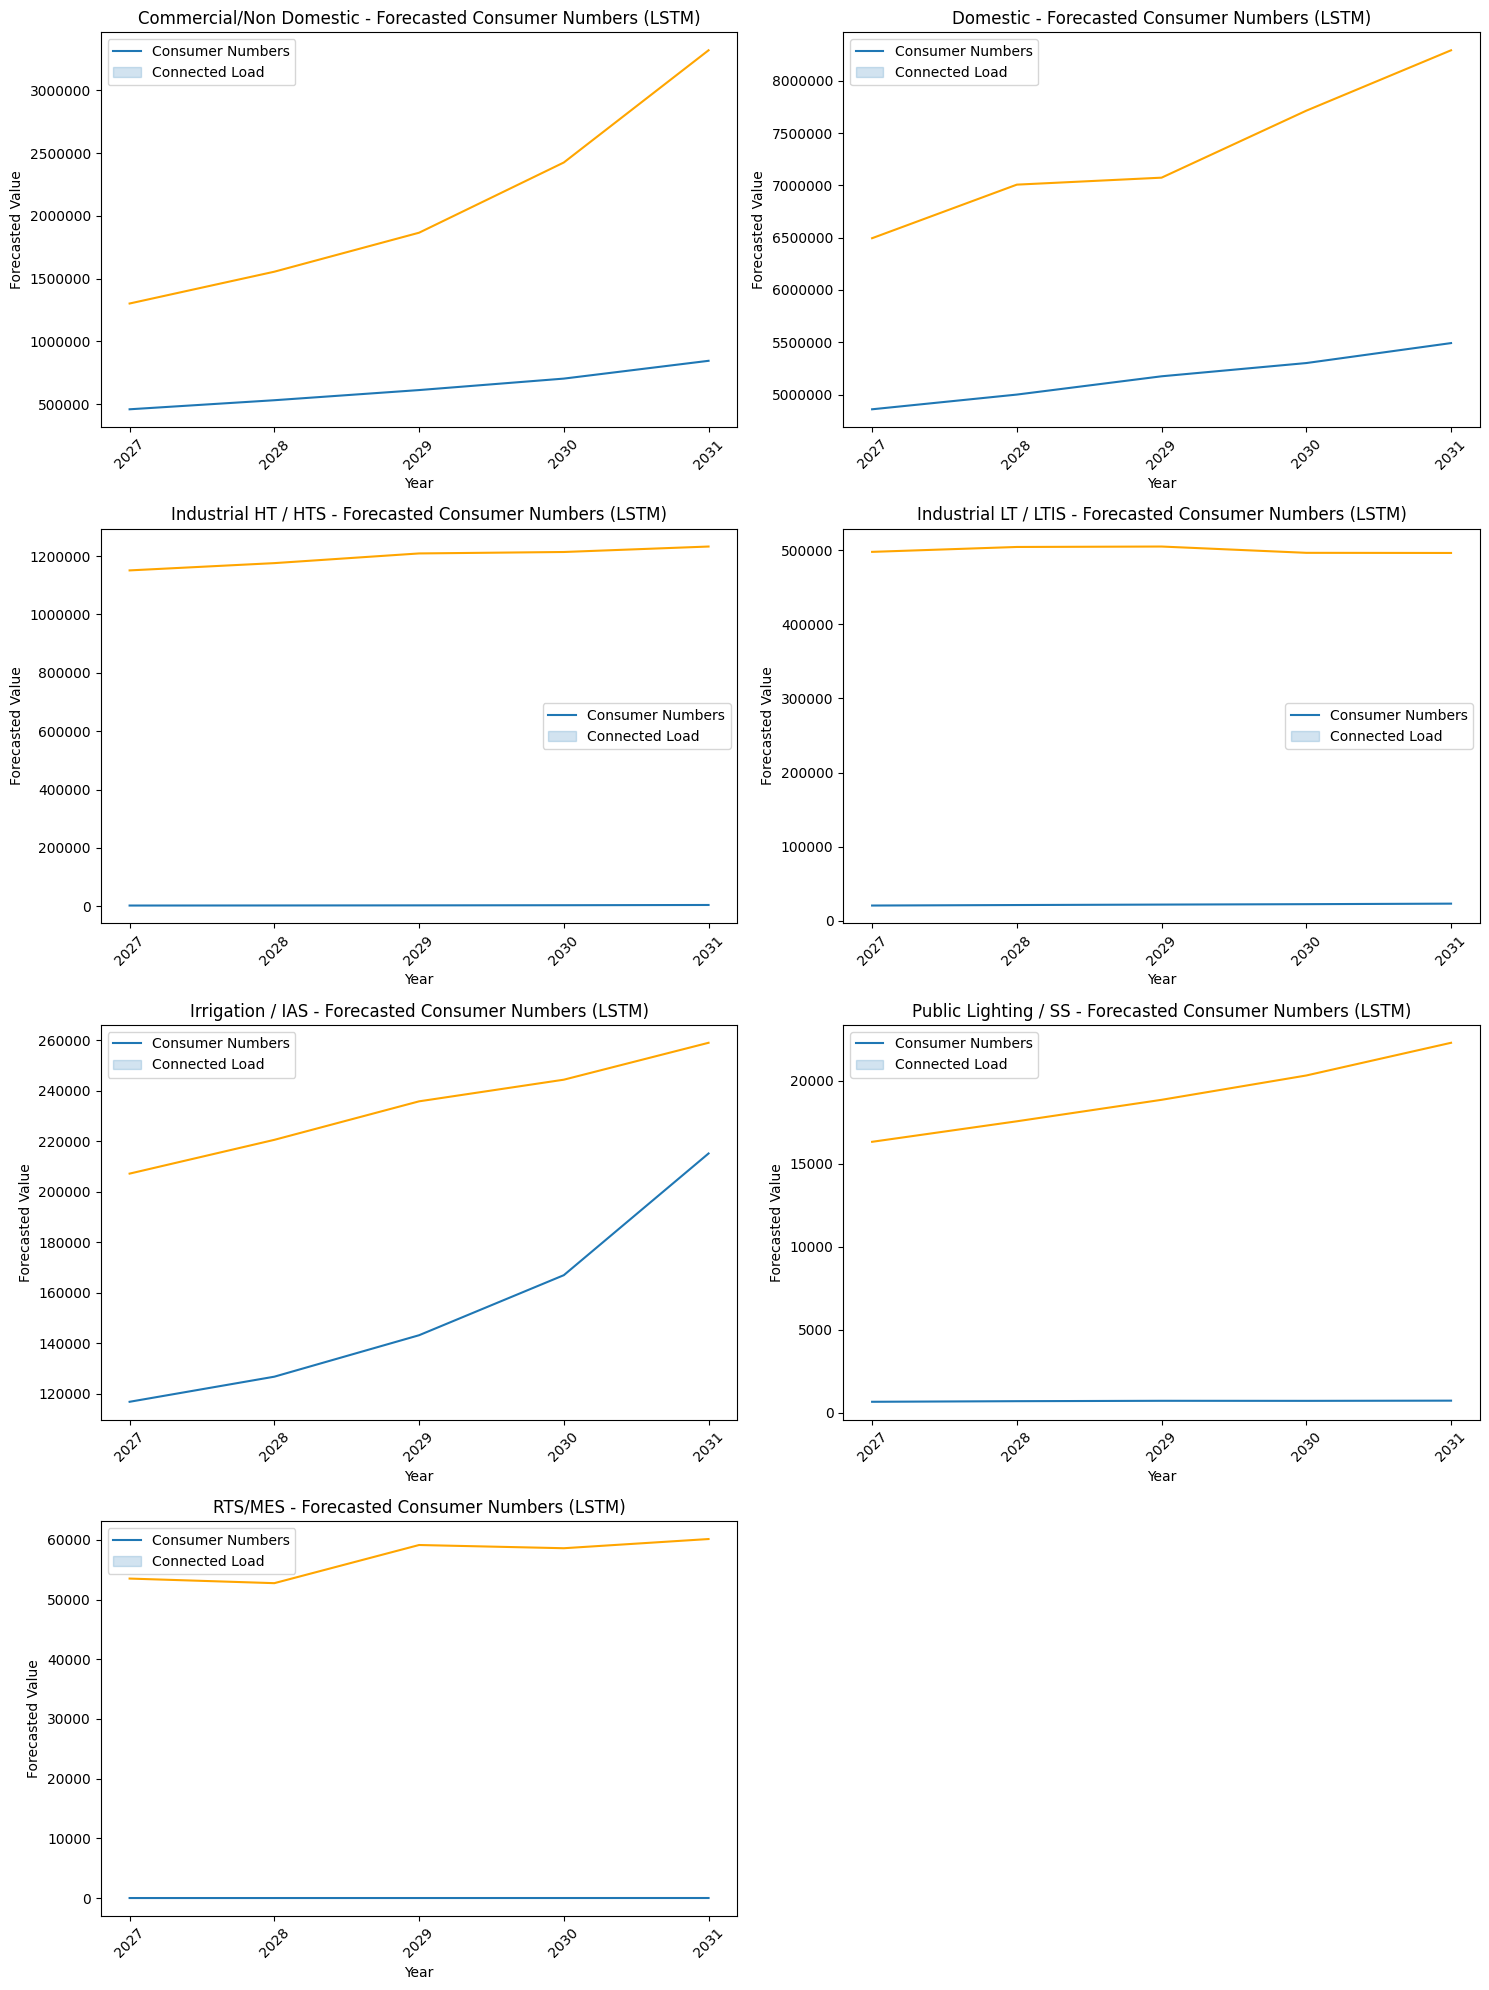

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get unique categories
categories = lstm_forecasted_df['Category'].unique()

# Determine the number of rows and columns for subplots
n_categories = len(categories)
n_cols = 2  # Two columns per row for two plots per category
n_rows = (n_categories + n_cols - 1) // n_cols

# Create figure and axes. Need 2 plots per category.
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5)) # Adjusted figure size for better readability
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, category in enumerate(categories):
    category_forecast_df = lstm_forecasted_df[lstm_forecasted_df['Category'] == category]

    # Plot Forecasted Consumer Numbers
    sns.lineplot(ax=axes[i], data=category_forecast_df, x='Year', y='Forecasted_Consumer_Numbers_LSTM')
    axes[i].set_title(f'{category} - Forecasted Consumer Numbers (LSTM)')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Forecasted Consumer Numbers')
    axes[i].ticklabel_format(style='plain', axis='y') # Prevent scientific notation
    axes[i].set_xticks(category_forecast_df['Year']) # Set x-ticks to the years in the data
    axes[i].tick_params(axis='x', rotation=45) # Rotate x-axis labels

    # Plot Forecasted Connected Load on the same subplot for comparison
    sns.lineplot(ax=axes[i], data=category_forecast_df, x='Year', y='Forecasted_Connected_Load_LSTM', color='orange')
    axes[i].set_ylabel('Forecasted Value') # General ylabel for both metrics
    axes[i].legend(['Consumer Numbers', 'Connected Load']) # Add legend


# Remove any unused subplots. Need to remove the remaining axes if the number of categories is odd.
for j in range(n_categories, len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout()
plt.show()

## Present the forecasts

### Subtask:
Visualize the forecasted consumer numbers and connected load for each category.


**Reasoning**:
The previous attempt to plot the data failed because both line plots for consumer numbers and connected load were trying to set the y-axis label, overwriting each other. The second line plot should not set the y-label again, and a legend should be added to differentiate the two lines on the same subplot. Also, the axes array flattening and indexing were incorrect for plotting two metrics per category on a 2-column grid. The axes should be accessed using `axes[i, 0]` for the first plot and `axes[i, 1]` for the second plot, or use a single index `axes[i]` and plot both lines on the same subplot if the number of columns in `subplots` is set to 2 * n_cols. The previous attempt used `axes[i]` and then `axes[i]` again, effectively plotting both on the same subplot, which is the desired behavior. The error was in the indexing for the second plot, which should have been `axes[i]`, not `axes[i*2+1]`. I will fix the indexing and add a legend.



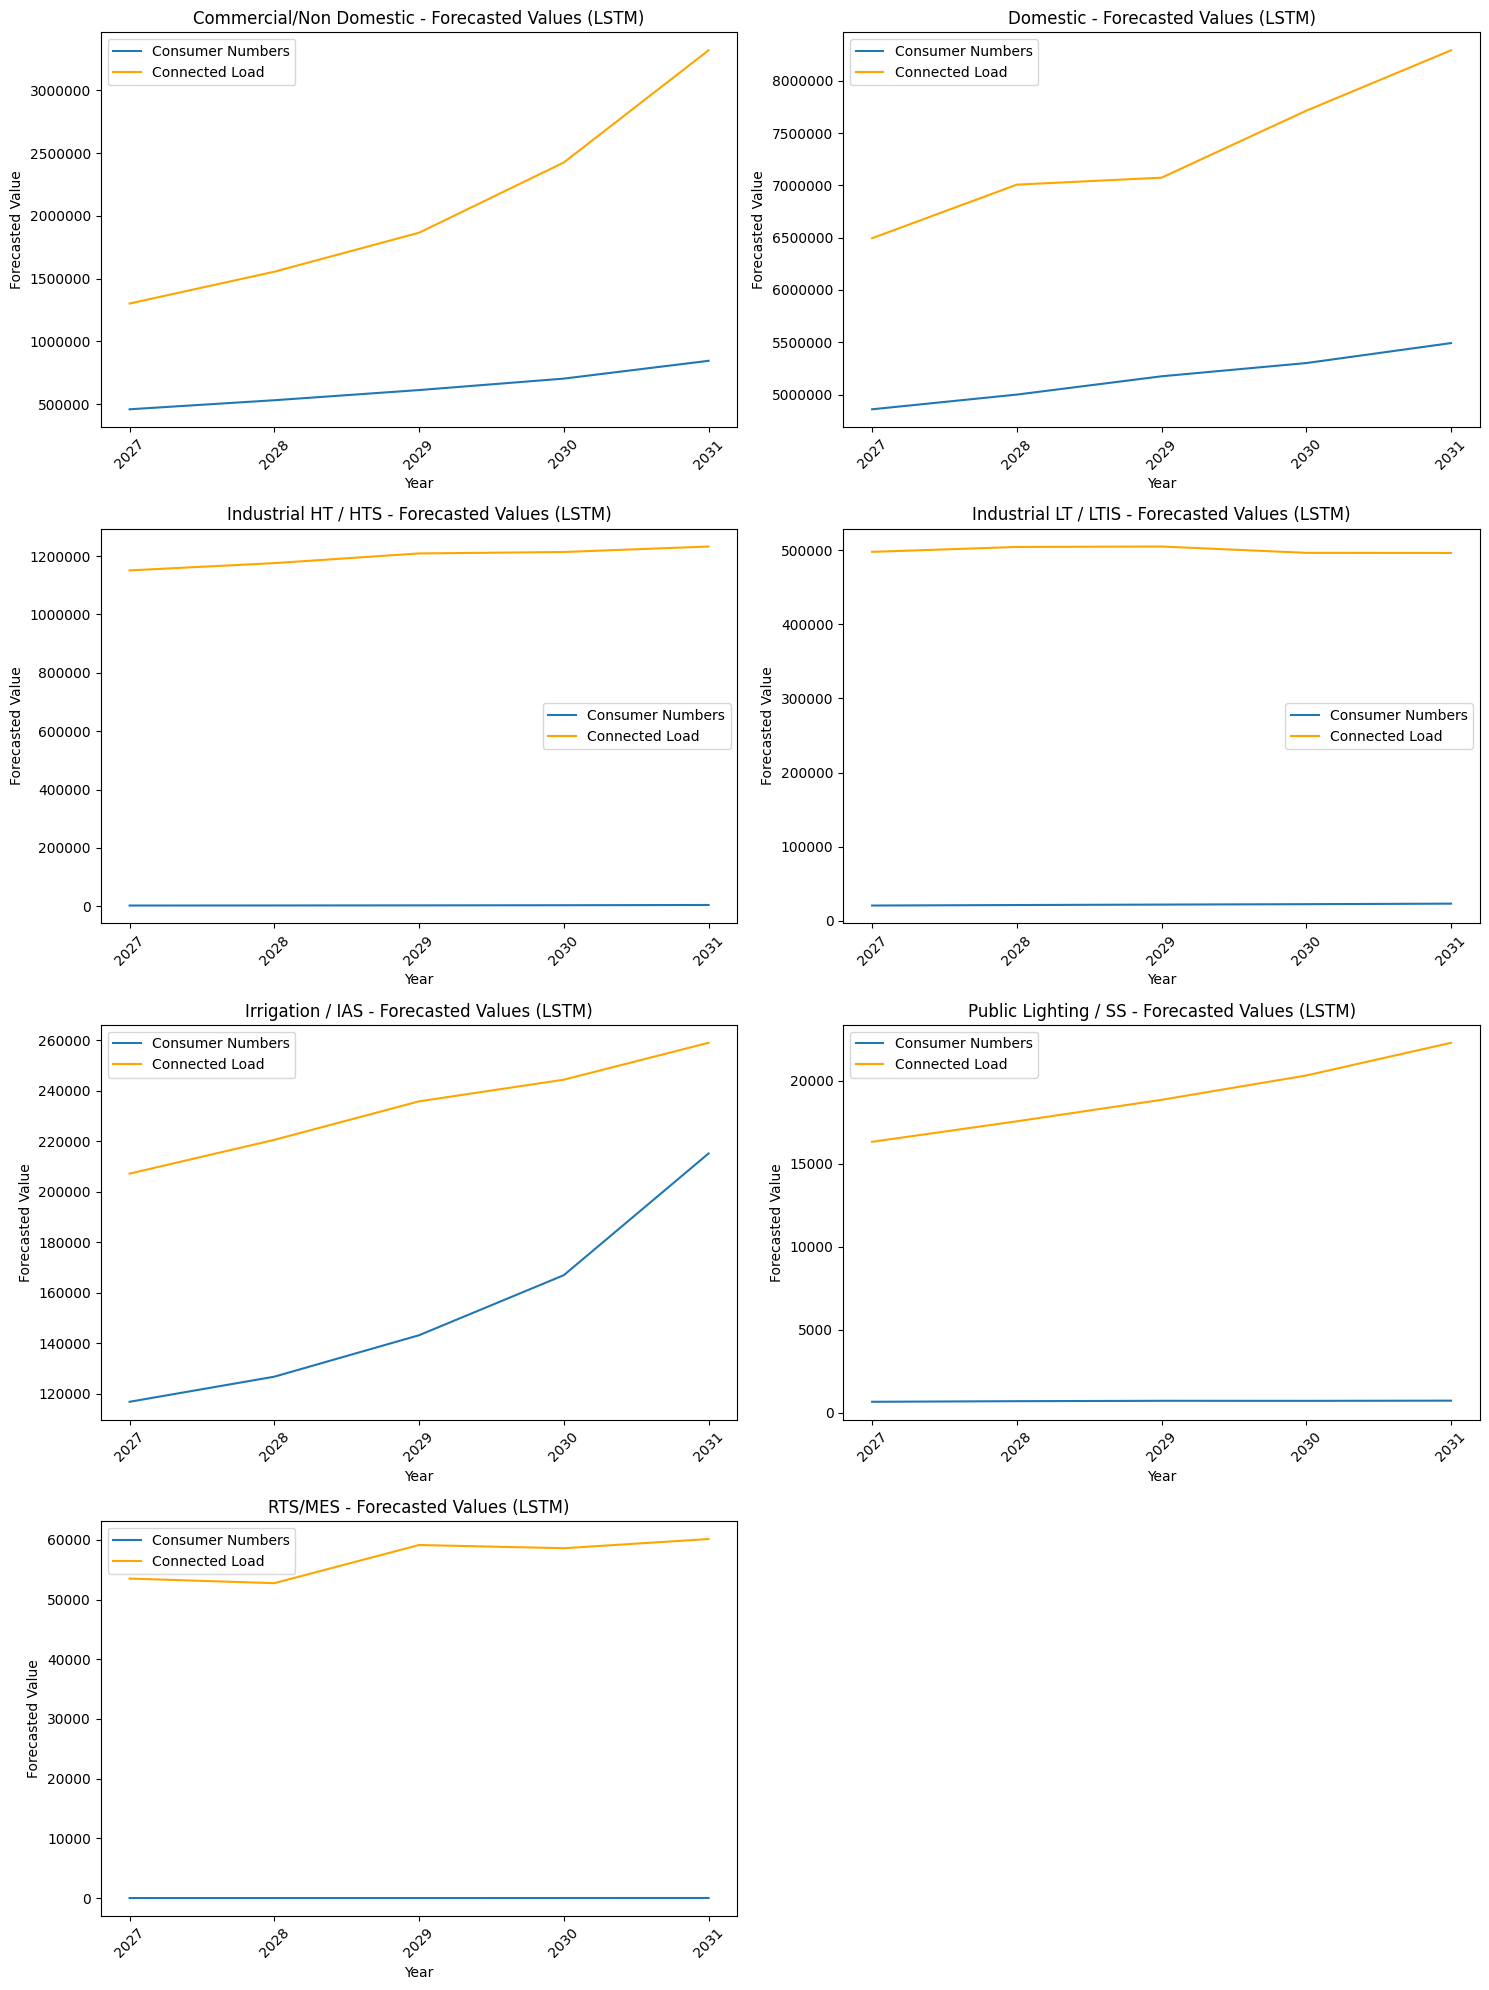

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get unique categories
categories = lstm_forecasted_df['Category'].unique()

# Determine the number of rows and columns for subplots
n_categories = len(categories)
n_cols = 2  # Two columns per row for two plots per category
n_rows = (n_categories + n_cols - 1) // n_cols

# Create figure and axes. Need 2 plots per category.
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5)) # Adjusted figure size for better readability
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, category in enumerate(categories):
    category_forecast_df = lstm_forecasted_df[lstm_forecasted_df['Category'] == category]

    # Plot Forecasted Consumer Numbers
    sns.lineplot(ax=axes[i], data=category_forecast_df, x='Year', y='Forecasted_Consumer_Numbers_LSTM', label='Consumer Numbers')
    axes[i].set_title(f'{category} - Forecasted Values (LSTM)') # General title for both metrics
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Forecasted Value') # General ylabel for both metrics
    axes[i].ticklabel_format(style='plain', axis='y') # Prevent scientific notation
    axes[i].set_xticks(category_forecast_df['Year']) # Set x-ticks to the years in the data
    axes[i].tick_params(axis='x', rotation=45) # Rotate x-axis labels

    # Plot Forecasted Connected Load on the same subplot for comparison
    sns.lineplot(ax=axes[i], data=category_forecast_df, x='Year', y='Forecasted_Connected_Load_LSTM', color='orange', label='Connected Load')
    axes[i].legend() # Add legend to differentiate the lines


# Remove any unused subplots. Need to remove the remaining axes if the number of categories is odd.
for j in range(n_categories, len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout()
plt.show()

Looking at the lstm_forecasted_df DataFrame and the visualizations:

The LSTM model has forecasted consumer numbers for each category from FY 2026-27 to FY 2030-31.
For most categories, the LSTM model predicts a continued increasing trend in consumer numbers over the forecast period.
The magnitude of the forecasted increase varies by category, with categories like 'Domestic' and 'Commercial/Non Domestic' showing larger absolute increases in consumer numbers compared to smaller categories.
The visualizations show the projected path of consumer numbers for each category, generally following a relatively smooth upward trend, which is expected from an LSTM model trained on trending data.
It's important to remember that these forecasts are based on the historical data provided and the LSTM model. Given the limited historical data (5 years), these forecasts should be interpreted with caution, as the model's ability to capture complex patterns and provide highly accurate long-term predictions is limited.

In [36]:
# Merge the LSTM and ARIMA forecasted DataFrames on Category and Year
comparison_df = pd.merge(
    lstm_forecasted_df[['Category', 'Year', 'Forecasted_Consumer_Numbers_LSTM']],
    arima_forecasted_df[['Category', 'Year', 'Forecasted_Consumer_Numbers_ARIMA']],
    on=['Category', 'Year'],
    how='left'
)

print("Comparison of LSTM vs ARIMA Consumer Number Forecasts (FY 2026-27 to FY 2030-31):")
display(comparison_df)

Comparison of LSTM vs ARIMA Consumer Number Forecasts (FY 2026-27 to FY 2030-31):


,Category,Year,Forecasted_Consumer_Numbers_LSTM,Forecasted_Consumer_Numbers_ARIMA
0,Commercial/Non Domestic,2027,4.595911e+05,5.261254e+05
1,Commercial/Non Domestic,2028,5.317438e+05,5.261254e+05
2,Commercial/Non Domestic,2029,6.126507e+05,5.261254e+05
3,Commercial/Non Domestic,2030,7.039702e+05,5.261254e+05
4,Commercial/Non Domestic,2031,8.456669e+05,5.261254e+05
5,Domestic,2027,4.859886e+06,4.981781e+06
6,Domestic,2028,5.000466e+06,4.981781e+06
7,Domestic,2029,5.175234e+06,4.981781e+06
8,Domestic,2030,5.301773e+06,4.981781e+06
9,Domestic,2031,5.492580e+06,4.981781e+06


In [38]:
# Merge the ARIMA and Linear Regression forecasted DataFrames on Category and Year
comparison_arima_linear_df = pd.merge(
    arima_forecasted_df[['Category', 'Year', 'Forecasted_Consumer_Numbers_ARIMA', 'Forecasted_Connected_Load_ARIMA']],
    forecasted_df[['Category', 'Year', 'Forecasted_Consumer_Numbers', 'Forecasted_Connected_Load']],
    on=['Category', 'Year'],
    how='left'
)

print("Comparison of ARIMA vs Linear Regression Forecasts (FY 2026-27 to FY 2030-31):")
display(comparison_arima_linear_df)

Comparison of ARIMA vs Linear Regression Forecasts (FY 2026-27 to FY 2030-31):


,Category,Year,Forecasted_Consumer_Numbers_ARIMA,Forecasted_Connected_Load_ARIMA,Forecasted_Consumer_Numbers,Forecasted_Connected_Load
0,Domestic,2027,4.981781e+06,6.734603e+06,5147975.5,7101571.7
1,Domestic,2028,4.981781e+06,6.734603e+06,5329125.6,7532607.8
2,Domestic,2029,4.981781e+06,6.734603e+06,5510275.7,7963643.9
3,Domestic,2030,4.981781e+06,6.734603e+06,5691425.8,8394680.0
4,Domestic,2031,4.981781e+06,6.734603e+06,5872575.9,8825716.1
5,Commercial/Non Domestic,2027,5.261254e+05,1.405973e+06,551220.4,1423791.1
6,Commercial/Non Domestic,2028,5.261254e+05,1.405973e+06,615196.2,1581780.0
7,Commercial/Non Domestic,2029,5.261254e+05,1.405973e+06,679172.0,1739768.9
8,Commercial/Non Domestic,2030,5.261254e+05,1.405973e+06,743147.8,1897757.8
9,Commercial/Non Domestic,2031,5.261254e+05,1.405973e+06,807123.6,2055746.7


In [40]:
# Merge the ARIMA, Linear Regression, and LSTM forecasted DataFrames on Category and Year
comparison_all_models_df = pd.merge(
    comparison_arima_linear_df,
    lstm_forecasted_df[['Category', 'Year', 'Forecasted_Consumer_Numbers_LSTM', 'Forecasted_Connected_Load_LSTM']],
    on=['Category', 'Year'],
    how='left'
)

print("Comparison of ARIMA, Linear Regression, and LSTM Forecasts (FY 2026-27 to FY 2030-31):")
display(comparison_all_models_df)

NameError: name 'lstm_forecasted_df' is not defined

## Prepare data for forecasting

### Subtask:
Restructure and preprocess the data to be suitable for an LSTM model, which typically requires data in a specific sequence format.

In [41]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np

def create_lstm_sequences(data, n_steps):
    """
    Prepare time series data for LSTM by creating sequences.

    Args:
        data (pd.DataFrame): DataFrame with only the target variable column.
        n_steps (int): The number of time steps to use as input features.

    Returns:
        tuple: A tuple containing the input sequences (X) and target values (y).
    """
    X, y = [], []
    for i in range(len(data) - n_steps):
        seq_x = data.iloc[i:(i + n_steps), 0].values # Accessing the first and only column
        seq_y = data.iloc[i + n_steps, 0]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# Assuming time_series_data is available from previous steps
# If not, the code to create it would need to be included here or in a preceding cell.
# For now, I'll assume it's available.

# Store prepared LSTM data
lstm_data = {}

# Define the number of time steps
n_steps = 3

for category, metrics_data in time_series_data.items():
    lstm_data[category] = {}

    for metric, ts_data in metrics_data.items():
        # Scale the data
        scaler = MinMaxScaler()
        scaled_data = scaler.fit_transform(ts_data[[metric]])

        # Create sequences
        X, y = create_lstm_sequences(pd.DataFrame(scaled_data, columns=[metric]), n_steps)

        # Reshape input to be 3D [samples, time_steps, features]
        X = X.reshape((X.shape[0], X.shape[1], 1))

        # Store the prepared data and the scaler
        lstm_data[category][metric] = {
            'X': X,
            'y': y,
            'scaler': scaler
        }

# Display the shape of the prepared data for one category as an example
print(f"Shape of LSTM input (X) for Domestic - Consumer_Numbers: {lstm_data['Domestic']['Consumer_Numbers']['X'].shape}")
print(f"Shape of LSTM target (y) for Domestic - Consumer_Numbers: {lstm_data['Domestic']['Consumer_Numbers']['y'].shape}")

Shape of LSTM input (X) for Domestic - Consumer_Numbers: (2, 3, 1)
Shape of LSTM target (y) for Domestic - Consumer_Numbers: (2,)


## Train and evaluate models

### Subtask:
Design, train, and evaluate LSTM models for both consumer numbers and connected load. This involves splitting data into training and testing sets, defining the LSTM architecture, training the model, and evaluating its performance.

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import warnings

# Suppress warnings that might arise from small dataset
warnings.filterwarnings("ignore")

def build_lstm_model(n_steps, n_features):
    """
    Builds a Sequential Keras LSTM model.

    Args:
        n_steps (int): The number of time steps in the input sequences.
        n_features (int): The number of features per time step (should be 1).

    Returns:
        keras.models.Sequential: Compiled LSTM model.
    """
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Store evaluation metrics for LSTM
lstm_evaluation_metrics = {}

# Iterate through each category and metric in the lstm_data dictionary
for category, metrics_data in lstm_data.items():
    lstm_evaluation_metrics[category] = {}

    for metric, data in metrics_data.items():
        X, y = data['X'], data['y']
        scaler = data['scaler']

        # Split data into training and testing sets (last data point for testing)
        X_train, X_test = X[:-1], X[-1]
        y_train, y_test = y[:-1], y[-1]

        # Determine the number of features
        n_features = X_train.shape[2]
        n_steps = X_train.shape[1]


        # Build the LSTM model
        model = build_lstm_model(n_steps, n_features)

        # Train the LSTM model
        # Use a small number of epochs and a small batch size due to limited data
        try:
            model.fit(X_train, y_train, epochs=50, batch_size=1, verbose=0) # Reduced epochs and verbose

            # Make a one-step prediction on the test set
            X_test = X_test.reshape((1, n_steps, n_features)) # Reshape for prediction
            y_pred_scaled = model.predict(X_test, verbose=0)

            # Inverse scale the predicted value and the actual test value
            y_pred = scaler.inverse_transform(y_pred_scaled)[0][0]
            y_actual = scaler.inverse_transform(y_test.reshape(-1, 1))[0][0]


            # Calculate evaluation metrics
            mae = mean_absolute_error([y_actual], [y_pred])
            rmse = np.sqrt(mean_squared_error([y_actual], [y_pred]))

            lstm_evaluation_metrics[category][metric] = {'MAE': mae, 'RMSE': rmse}

        except Exception as e:
             lstm_evaluation_metrics[category][metric] = {'MAE': f'Error: {e}', 'RMSE': f'Error: {e}'}
             print(f"Error training or evaluating LSTM for {category} - {metric}: {e}")


# Aggregate evaluation metrics into a pandas DataFrame
lstm_aggregated_metrics = pd.DataFrame.from_dict({(i,j): lstm_evaluation_metrics[i][j]
                           for i in lstm_evaluation_metrics.keys()
                           for j in lstm_evaluation_metrics[i].keys()},
                           orient='index')

print("LSTM Evaluation Metrics (MAE and RMSE) for each category and metric (One-step forecast):")
display(lstm_aggregated_metrics)

LSTM Evaluation Metrics (MAE and RMSE) for each category and metric (One-step forecast):


MAE          RMSE
Domestic                Consumer_Numbers  4.495075e+05  4.495075e+05
                        Connected_Load    1.267116e+06  1.267116e+06
Commercial/Non Domestic Consumer_Numbers  1.784574e+05  1.784574e+05
                        Connected_Load    3.572537e+05  3.572537e+05
Public Lighting / SS    Consumer_Numbers  2.485536e+02  2.485536e+02
                        Connected_Load    3.712971e+03  3.712971e+03
Irrigation / IAS        Consumer_Numbers  1.424754e+04  1.424754e+04
                        Connected_Load    5.500912e+04  5.500912e+04
Industrial LT / LTIS    Consumer_Numbers  2.494693e+03  2.494693e+03
                        Connected_Load    1.821615e+05  1.821615e+05
Industrial HT / HTS     Consumer_Numbers  4.604841e+02  4.604841e+02
                        Connected_Load    1.451189e+05  1.451189e+05
RTS/MES                 Consumer_Numbers  2.068846e+00  2.068846e+00
                        Connected_Load    4.298672e+02  4.298672e+02

## Forecast future values

### Subtask:
Use the trained LSTM models to forecast consumer numbers and connected load for the specified future financial years (FY 2026-27 to FY 2030-31).

In [43]:
import numpy as np

# Create DataFrame for future years (2027 to 2031)
future_years_lstm = pd.DataFrame({'Year': range(2027, 2032)})

# Store forecasted values for LSTM
lstm_forecasted_data = []

# Define the number of steps used in the LSTM model (should be the same as n_steps used for training)
# Based on the previous code, n_steps was defined as 3
n_steps = 3

# Iterate through each category and metric in the lstm_data dictionary
for category, metrics_data in lstm_data.items():

    for metric, data in metrics_data.items():
        X_train, y_train = data['X'], data['y']
        scaler = data['scaler']

        # Retrieve the trained model (assuming it's stored or can be retrained here for demonstration)
        # In a real scenario, you would load the trained model
        n_features = X_train.shape[2]
        model = build_lstm_model(n_steps, n_features)
        model.fit(X_train, y_train, epochs=50, batch_size=1, verbose=0) # Retrain the model for forecasting

        # Get the last historical data point as the starting point for forecasting
        last_historical_sequence = X_train[-1]
        current_input_sequence = last_historical_sequence.copy()

        # List to store future predictions for the current metric and category
        future_predictions = []

        # Forecast future years
        for year in future_years_lstm['Year']:
            # Reshape the input sequence for prediction
            input_for_prediction = current_input_sequence.reshape((1, n_steps, n_features))

            # Make a one-step prediction
            predicted_value_scaled = model.predict(input_for_prediction, verbose=0)

            # Inverse scale the prediction
            predicted_value = scaler.inverse_transform(predicted_value_scaled)[0][0]

            # Append the prediction to the list
            future_predictions.append(predicted_value)

            # Update the input sequence for the next forecast step
            # Remove the oldest value and add the new predicted scaled value
            current_input_sequence = np.append(current_input_sequence[1:], predicted_value_scaled[0])


        # Store the forecasted values with category, financial year, and year
        # Now storing the metric name and the value separately to facilitate pivoting
        forecast_column_name = f'Forecasted_{metric}_LSTM'
        for i, year in enumerate(future_years_lstm['Year']):
            financial_year = f'FY {year}-{str(year+1)[-2:]}'
            forecasted_value = future_predictions[i]

            lstm_forecasted_data.append({
                'Category': category,
                'Financial_Year': financial_year,
                'Year': year,
                'Metric': forecast_column_name, # Store the metric name
                'Value': forecasted_value      # Store the forecasted value under 'Value'
            })

# Create a DataFrame from the forecasted data
lstm_forecasted_df = pd.DataFrame(lstm_forecasted_data)

# Pivot the DataFrame to have separate columns for Consumer_Numbers and Connected_Load
lstm_forecasted_df = lstm_forecasted_df.pivot_table(
    index=['Category', 'Financial_Year', 'Year'],
    columns='Metric', # Use the 'Metric' column for pivoting
    values='Value'    # Use the 'Value' column for the values
).reset_index()

# The column names after pivoting will be the unique values in the 'Metric' column.
# They should already be in the desired format 'Forecasted_Consumer_Numbers_LSTM' and 'Forecasted_Connected_Load_LSTM'.
lstm_forecasted_df.columns.name = None


print("LSTM Forecasted Consumer Numbers and Connected Load (FY 2026-27 to FY 2030-31):")
display(lstm_forecasted_df)

LSTM Forecasted Consumer Numbers and Connected Load (FY 2026-27 to FY 2030-31):


,Category,Financial_Year,Year,Forecasted_Connected_Load_LSTM,Forecasted_Consumer_Numbers_LSTM
0,Commercial/Non Domestic,FY 2027-28,2027,1.258594e+06,4.966022e+05
1,Commercial/Non Domestic,FY 2028-29,2028,1.461599e+06,6.001626e+05
2,Commercial/Non Domestic,FY 2029-30,2029,1.691302e+06,7.380477e+05
3,Commercial/Non Domestic,FY 2030-31,2030,2.055052e+06,9.441489e+05
4,Commercial/Non Domestic,FY 2031-32,2031,2.579924e+06,1.303277e+06
5,Domestic,FY 2027-28,2027,5.532694e+06,5.028316e+06
6,Domestic,FY 2028-29,2028,5.563359e+06,5.302334e+06
7,Domestic,FY 2029-30,2029,5.466259e+06,5.746704e+06
8,Domestic,FY 2030-31,2030,5.441493e+06,6.360312e+06
9,Domestic,FY 2031-32,2031,5.433568e+06,7.428706e+06


In [44]:
# Merge the ARIMA, Linear Regression, and LSTM forecasted DataFrames on Category and Year
comparison_all_models_df = pd.merge(
    comparison_arima_linear_df,
    lstm_forecasted_df[['Category', 'Year', 'Forecasted_Consumer_Numbers_LSTM', 'Forecasted_Connected_Load_LSTM']],
    on=['Category', 'Year'],
    how='left'
)

print("Comparison of ARIMA, Linear Regression, and LSTM Forecasts (FY 2026-27 to FY 2030-31):")
display(comparison_all_models_df)

Comparison of ARIMA, Linear Regression, and LSTM Forecasts (FY 2026-27 to FY 2030-31):


,Category,Year,Forecasted_Consumer_Numbers_ARIMA,Forecasted_Connected_Load_ARIMA,Forecasted_Consumer_Numbers,Forecasted_Connected_Load,Forecasted_Consumer_Numbers_LSTM,Forecasted_Connected_Load_LSTM
0,Domestic,2027,4.981781e+06,6.734603e+06,5147975.5,7101571.7,5.028316e+06,5.532694e+06
1,Domestic,2028,4.981781e+06,6.734603e+06,5329125.6,7532607.8,5.302334e+06,5.563359e+06
2,Domestic,2029,4.981781e+06,6.734603e+06,5510275.7,7963643.9,5.746704e+06,5.466259e+06
3,Domestic,2030,4.981781e+06,6.734603e+06,5691425.8,8394680.0,6.360312e+06,5.441493e+06
4,Domestic,2031,4.981781e+06,6.734603e+06,5872575.9,8825716.1,7.428706e+06,5.433568e+06
5,Commercial/Non Domestic,2027,5.261254e+05,1.405973e+06,551220.4,1423791.1,4.966022e+05,1.258594e+06
6,Commercial/Non Domestic,2028,5.261254e+05,1.405973e+06,615196.2,1581780.0,6.001626e+05,1.461599e+06
7,Commercial/Non Domestic,2029,5.261254e+05,1.405973e+06,679172.0,1739768.9,7.380477e+05,1.691302e+06
8,Commercial/Non Domestic,2030,5.261254e+05,1.405973e+06,743147.8,1897757.8,9.441489e+05,2.055052e+06
9,Commercial/Non Domestic,2031,5.261254e+05,1.405973e+06,807123.6,2055746.7,1.303277e+06,2.579924e+06


In [45]:
from google.colab import files

# Save the DataFrame to an Excel file
excel_file_path = 'forecast_comparison_all_models.xlsx'
comparison_all_models_df.to_excel(excel_file_path, index=False)

# Download the file
files.download(excel_file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Train and evaluate models

### Subtask:
Train the selected models on the historical data and evaluate their performance.

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd # Added import for pandas

# Filter out aggregate categories (assuming filtered_merged_df is available)
# If not, the code to create filtered_merged_df would need to be included here.
# For now, I'll assume it's available.

# Store evaluation metrics
evaluation_metrics = {}

for category in filtered_merged_df['Category'].unique():
    evaluation_metrics[category] = {}

    # Filter data for the current category
    category_df = filtered_merged_df[filtered_merged_df['Category'] == category].copy()

    # Prepare data for Consumer_Numbers forecasting
    X_consumers = category_df[['Year']]
    y_consumers = category_df['Consumer_Numbers']

    # Prepare data for Connected_Load forecasting
    X_load = category_df[['Year']]
    y_load = category_df['Connected_Load']

    # Split data into training and testing sets (using the last year for testing)
    # Find the last year in the dataset
    last_year = category_df['Year'].max()
    X_train_consumers = X_consumers[X_consumers['Year'] < last_year]
    X_test_consumers = X_consumers[X_consumers['Year'] == last_year]
    y_train_consumers = y_consumers[category_df['Year'] < last_year]
    y_test_consumers = y_consumers[category_df['Year'] == last_year]

    X_train_load = X_load[X_load['Year'] < last_year]
    X_test_load = X_load[X_load['Year'] == last_year]
    y_train_load = y_load[category_df['Year'] < last_year]
    y_test_load = y_load[category_df['Year'] == last_year]


    # Train Linear Regression model for Consumer_Numbers
    model_consumers = LinearRegression()
    model_consumers.fit(X_train_consumers, y_train_consumers)

    # Evaluate Consumer_Numbers model
    y_pred_consumers = model_consumers.predict(X_test_consumers)
    mae_consumers = mean_absolute_error(y_test_consumers, y_pred_consumers)
    rmse_consumers = np.sqrt(mean_squared_error(y_test_consumers, y_pred_consumers))

    evaluation_metrics[category]['Consumer_Numbers'] = {'MAE': mae_consumers, 'RMSE': rmse_consumers}

    # Train Linear Regression model for Connected_Load
    model_load = LinearRegression()
    model_load.fit(X_train_load, y_train_load)

    # Evaluate Connected_Load model
    y_pred_load = model_load.predict(X_test_load)
    mae_load = mean_absolute_error(y_test_load, y_pred_load)
    rmse_load = np.sqrt(mean_squared_error(y_test_load, y_pred_load))

    evaluation_metrics[category]['Connected_Load'] = {'MAE': mae_load, 'RMSE': rmse_load}

# Aggregate evaluation metrics
aggregated_metrics = pd.DataFrame.from_dict({(i,j): evaluation_metrics[i][j]
                           for i in evaluation_metrics.keys()
                           for j in evaluation_metrics[i].keys()},
                           orient='index')

print("Evaluation Metrics (MAE and RMSE) for each category and metric:")
display(aggregated_metrics)

Evaluation Metrics (MAE and RMSE) for each category and metric:


MAE     RMSE
Domestic                Consumer_Numbers  16446.5  16446.5
                        Connected_Load    89316.0  89316.0
Commercial/Non Domestic Consumer_Numbers  27091.0  27091.0
                        Connected_Load    76622.0  76622.0
Public Lighting / SS    Consumer_Numbers     38.0     38.0
                        Connected_Load      293.5    293.5
Irrigation / IAS        Consumer_Numbers    577.0    577.0
                        Connected_Load     3945.0   3945.0
Industrial LT / LTIS    Consumer_Numbers    176.0    176.0
                        Connected_Load    20018.5  20018.5
Industrial HT / HTS     Consumer_Numbers     27.0     27.0
                        Connected_Load     9155.0   9155.0
RTS/MES                 Consumer_Numbers      0.5      0.5
                        Connected_Load     1985.5   1985.5

In [48]:
print("Linear Regression Evaluation Metrics (MAE and RMSE):")
display(aggregated_metrics)

print("\nARIMA Evaluation Metrics (MAE and RMSE):")
display(arima_aggregated_metrics)

print("\nLSTM Evaluation Metrics (MAE and RMSE):")
display(lstm_aggregated_metrics)

Linear Regression Evaluation Metrics (MAE and RMSE):


MAE     RMSE
Domestic                Consumer_Numbers  16446.5  16446.5
                        Connected_Load    89316.0  89316.0
Commercial/Non Domestic Consumer_Numbers  27091.0  27091.0
                        Connected_Load    76622.0  76622.0
Public Lighting / SS    Consumer_Numbers     38.0     38.0
                        Connected_Load      293.5    293.5
Irrigation / IAS        Consumer_Numbers    577.0    577.0
                        Connected_Load     3945.0   3945.0
Industrial LT / LTIS    Consumer_Numbers    176.0    176.0
                        Connected_Load    20018.5  20018.5
Industrial HT / HTS     Consumer_Numbers     27.0     27.0
                        Connected_Load     9155.0   9155.0
RTS/MES                 Consumer_Numbers      0.5      0.5
                        Connected_Load     1985.5   1985.5


ARIMA Evaluation Metrics (MAE and RMSE):


NameError: name 'arima_aggregated_metrics' is not defined

In [46]:
print("Linear Regression Evaluation Metrics (MAE and RMSE):")
display(aggregated_metrics)

print("\nARIMA Evaluation Metrics (MAE and RMSE):")
display(arima_aggregated_metrics)

print("\nLSTM Evaluation Metrics (MAE and RMSE):")
display(lstm_aggregated_metrics)

Linear Regression Evaluation Metrics (MAE and RMSE):


NameError: name 'aggregated_metrics' is not defined